In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import cv2
from PIL import Image
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten

from keras import backend as K

Using TensorFlow backend.


In [90]:
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [139]:
from skimage.transform import resize
from skimage.io import imsave

In [4]:
K.set_image_data_format('channels_last')

In [5]:
data_path = "/home/root/share/ultrasound-nerve-segmentation.zip"

In [19]:
!mkdir /home/root/share/ultrasound-nerve-segmentation-1

In [21]:
!unzip /home/root/share/ultrasound-nerve-segmentation.zip -d /home/root/share/ultrasound-nerve-segmentation-1

Archive:  /home/root/share/ultrasound-nerve-segmentation.zip
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_masks.csv  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train.zip  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/sample_submission.csv  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test.zip  


In [22]:
!unzip /home/root/share/ultrasound-nerve-segmentation-1/train.zip 
!unzip /home/root/share/ultrasound-nerve-segmentation-1/test.zip

Archive:  /home/root/share/ultrasound-nerve-segmentation-1/train.zip
   creating: train/
  inflating: train/10_1.tif          
  inflating: train/10_10.tif         
  inflating: train/10_100.tif        
  inflating: train/10_100_mask.tif   
  inflating: train/10_101.tif        
  inflating: train/10_101_mask.tif   
  inflating: train/10_102.tif        
  inflating: train/10_102_mask.tif   
  inflating: train/10_103.tif        
  inflating: train/10_103_mask.tif   
  inflating: train/10_104.tif        
  inflating: train/10_104_mask.tif   
  inflating: train/10_105.tif        
  inflating: train/10_105_mask.tif   
  inflating: train/10_106.tif        
  inflating: train/10_106_mask.tif   
  inflating: train/10_107.tif        
  inflating: train/10_107_mask.tif   
  inflating: train/10_108.tif        
  inflating: train/10_108_mask.tif   
  inflating: train/10_109.tif        
  inflating: train/10_109_mask.tif   
  inflating: train/10_10_mask.tif    
  inflating: train/10_11.tif         

  inflating: train/10_9.tif          
  inflating: train/10_90.tif         
  inflating: train/10_90_mask.tif    
  inflating: train/10_91.tif         
  inflating: train/10_91_mask.tif    
  inflating: train/10_92.tif         
  inflating: train/10_92_mask.tif    
  inflating: train/10_93.tif         
  inflating: train/10_93_mask.tif    
  inflating: train/10_94.tif         
  inflating: train/10_94_mask.tif    
  inflating: train/10_95.tif         
  inflating: train/10_95_mask.tif    
  inflating: train/10_96.tif         
  inflating: train/10_96_mask.tif    
  inflating: train/10_97.tif         
  inflating: train/10_97_mask.tif    
  inflating: train/10_98.tif         
  inflating: train/10_98_mask.tif    
  inflating: train/10_99.tif         
  inflating: train/10_99_mask.tif    
  inflating: train/10_9_mask.tif     
  inflating: train/11_1.tif          
  inflating: train/11_10.tif         
  inflating: train/11_100.tif        
  inflating: train/11_100_mask.tif   
  inflating:

  inflating: train/11_7_mask.tif     
  inflating: train/11_8.tif          
  inflating: train/11_80.tif         
  inflating: train/11_80_mask.tif    
  inflating: train/11_81.tif         
  inflating: train/11_81_mask.tif    
  inflating: train/11_82.tif         
  inflating: train/11_82_mask.tif    
  inflating: train/11_83.tif         
  inflating: train/11_83_mask.tif    
  inflating: train/11_84.tif         
  inflating: train/11_84_mask.tif    
  inflating: train/11_85.tif         
  inflating: train/11_85_mask.tif    
  inflating: train/11_86.tif         
  inflating: train/11_86_mask.tif    
  inflating: train/11_87.tif         
  inflating: train/11_87_mask.tif    
  inflating: train/11_88.tif         
  inflating: train/11_88_mask.tif    
  inflating: train/11_89.tif         
  inflating: train/11_89_mask.tif    
  inflating: train/11_8_mask.tif     
  inflating: train/11_9.tif          
  inflating: train/11_90.tif         
  inflating: train/11_90_mask.tif    
  inflating:

  inflating: train/12_73.tif         
  inflating: train/12_73_mask.tif    
  inflating: train/12_74.tif         
  inflating: train/12_74_mask.tif    
  inflating: train/12_75.tif         
  inflating: train/12_75_mask.tif    
  inflating: train/12_76.tif         
  inflating: train/12_76_mask.tif    
  inflating: train/12_77.tif         
  inflating: train/12_77_mask.tif    
  inflating: train/12_78.tif         
  inflating: train/12_78_mask.tif    
  inflating: train/12_79.tif         
  inflating: train/12_79_mask.tif    
  inflating: train/12_7_mask.tif     
  inflating: train/12_8.tif          
  inflating: train/12_80.tif         
  inflating: train/12_80_mask.tif    
  inflating: train/12_81.tif         
  inflating: train/12_81_mask.tif    
  inflating: train/12_82.tif         
  inflating: train/12_82_mask.tif    
  inflating: train/12_83.tif         
  inflating: train/12_83_mask.tif    
  inflating: train/12_84.tif         
  inflating: train/12_84_mask.tif    
  inflating:

  inflating: train/13_66.tif         
  inflating: train/13_66_mask.tif    
  inflating: train/13_67.tif         
  inflating: train/13_67_mask.tif    
  inflating: train/13_68.tif         
  inflating: train/13_68_mask.tif    
  inflating: train/13_69.tif         
  inflating: train/13_69_mask.tif    
  inflating: train/13_6_mask.tif     
  inflating: train/13_7.tif          
  inflating: train/13_70.tif         
  inflating: train/13_70_mask.tif    
  inflating: train/13_71.tif         
  inflating: train/13_71_mask.tif    
  inflating: train/13_72.tif         
  inflating: train/13_72_mask.tif    
  inflating: train/13_73.tif         
  inflating: train/13_73_mask.tif    
  inflating: train/13_74.tif         
  inflating: train/13_74_mask.tif    
  inflating: train/13_75.tif         
  inflating: train/13_75_mask.tif    
  inflating: train/13_76.tif         
  inflating: train/13_76_mask.tif    
  inflating: train/13_77.tif         
  inflating: train/13_77_mask.tif    
  inflating:

  inflating: train/14_58.tif         
  inflating: train/14_58_mask.tif    
  inflating: train/14_59.tif         
  inflating: train/14_59_mask.tif    
  inflating: train/14_5_mask.tif     
  inflating: train/14_6.tif          
  inflating: train/14_60.tif         
  inflating: train/14_60_mask.tif    
  inflating: train/14_61.tif         
  inflating: train/14_61_mask.tif    
  inflating: train/14_62.tif         
  inflating: train/14_62_mask.tif    
  inflating: train/14_63.tif         
  inflating: train/14_63_mask.tif    
  inflating: train/14_64.tif         
  inflating: train/14_64_mask.tif    
  inflating: train/14_65.tif         
  inflating: train/14_65_mask.tif    
  inflating: train/14_66.tif         
  inflating: train/14_66_mask.tif    
  inflating: train/14_67.tif         
  inflating: train/14_67_mask.tif    
  inflating: train/14_68.tif         
  inflating: train/14_68_mask.tif    
  inflating: train/14_69.tif         
  inflating: train/14_69_mask.tif    
  inflating:

  inflating: train/15_5.tif          
  inflating: train/15_50.tif         
  inflating: train/15_50_mask.tif    
  inflating: train/15_51.tif         
  inflating: train/15_51_mask.tif    
  inflating: train/15_52.tif         
  inflating: train/15_52_mask.tif    
  inflating: train/15_53.tif         
  inflating: train/15_53_mask.tif    
  inflating: train/15_54.tif         
  inflating: train/15_54_mask.tif    
  inflating: train/15_55.tif         
  inflating: train/15_55_mask.tif    
  inflating: train/15_56.tif         
  inflating: train/15_56_mask.tif    
  inflating: train/15_57.tif         
  inflating: train/15_57_mask.tif    
  inflating: train/15_58.tif         
  inflating: train/15_58_mask.tif    
  inflating: train/15_59.tif         
  inflating: train/15_59_mask.tif    
  inflating: train/15_5_mask.tif     
  inflating: train/15_6.tif          
  inflating: train/15_60.tif         
  inflating: train/15_60_mask.tif    
  inflating: train/15_61.tif         
  inflating:

  inflating: train/16_43_mask.tif    
  inflating: train/16_44.tif         
  inflating: train/16_44_mask.tif    
  inflating: train/16_45.tif         
  inflating: train/16_45_mask.tif    
  inflating: train/16_46.tif         
  inflating: train/16_46_mask.tif    
  inflating: train/16_47.tif         
  inflating: train/16_47_mask.tif    
  inflating: train/16_48.tif         
  inflating: train/16_48_mask.tif    
  inflating: train/16_49.tif         
  inflating: train/16_49_mask.tif    
  inflating: train/16_4_mask.tif     
  inflating: train/16_5.tif          
  inflating: train/16_50.tif         
  inflating: train/16_50_mask.tif    
  inflating: train/16_51.tif         
  inflating: train/16_51_mask.tif    
  inflating: train/16_52.tif         
  inflating: train/16_52_mask.tif    
  inflating: train/16_53.tif         
  inflating: train/16_53_mask.tif    
  inflating: train/16_54.tif         
  inflating: train/16_54_mask.tif    
  inflating: train/16_55.tif         
  inflating:

  inflating: train/17_35_mask.tif    
  inflating: train/17_36.tif         
  inflating: train/17_36_mask.tif    
  inflating: train/17_37.tif         
  inflating: train/17_37_mask.tif    
  inflating: train/17_38.tif         
  inflating: train/17_38_mask.tif    
  inflating: train/17_39.tif         
  inflating: train/17_39_mask.tif    
  inflating: train/17_3_mask.tif     
  inflating: train/17_4.tif          
  inflating: train/17_40.tif         
  inflating: train/17_40_mask.tif    
  inflating: train/17_41.tif         
  inflating: train/17_41_mask.tif    
  inflating: train/17_42.tif         
  inflating: train/17_42_mask.tif    
  inflating: train/17_43.tif         
  inflating: train/17_43_mask.tif    
  inflating: train/17_44.tif         
  inflating: train/17_44_mask.tif    
  inflating: train/17_45.tif         
  inflating: train/17_45_mask.tif    
  inflating: train/17_46.tif         
  inflating: train/17_46_mask.tif    
  inflating: train/17_47.tif         
  inflating:

  inflating: train/18_28.tif         
  inflating: train/18_28_mask.tif    
  inflating: train/18_29.tif         
  inflating: train/18_29_mask.tif    
  inflating: train/18_2_mask.tif     
  inflating: train/18_3.tif          
  inflating: train/18_30.tif         
  inflating: train/18_30_mask.tif    
  inflating: train/18_31.tif         
  inflating: train/18_31_mask.tif    
  inflating: train/18_32.tif         
  inflating: train/18_32_mask.tif    
  inflating: train/18_33.tif         
  inflating: train/18_33_mask.tif    
  inflating: train/18_34.tif         
  inflating: train/18_34_mask.tif    
  inflating: train/18_35.tif         
  inflating: train/18_35_mask.tif    
  inflating: train/18_36.tif         
  inflating: train/18_36_mask.tif    
  inflating: train/18_37.tif         
  inflating: train/18_37_mask.tif    
  inflating: train/18_38.tif         
  inflating: train/18_38_mask.tif    
  inflating: train/18_39.tif         
  inflating: train/18_39_mask.tif    
  inflating:

  inflating: train/19_20.tif         
  inflating: train/19_20_mask.tif    
  inflating: train/19_21.tif         
  inflating: train/19_21_mask.tif    
  inflating: train/19_22.tif         
  inflating: train/19_22_mask.tif    
  inflating: train/19_23.tif         
  inflating: train/19_23_mask.tif    
  inflating: train/19_24.tif         
  inflating: train/19_24_mask.tif    
  inflating: train/19_25.tif         
  inflating: train/19_25_mask.tif    
  inflating: train/19_26.tif         
  inflating: train/19_26_mask.tif    
  inflating: train/19_27.tif         
  inflating: train/19_27_mask.tif    
  inflating: train/19_28.tif         
  inflating: train/19_28_mask.tif    
  inflating: train/19_29.tif         
  inflating: train/19_29_mask.tif    
  inflating: train/19_2_mask.tif     
  inflating: train/19_3.tif          
  inflating: train/19_30.tif         
  inflating: train/19_30_mask.tif    
  inflating: train/19_31.tif         
  inflating: train/19_31_mask.tif    
  inflating:

  inflating: train/1_120.tif         
  inflating: train/1_120_mask.tif    
  inflating: train/1_12_mask.tif     
  inflating: train/1_13.tif          
  inflating: train/1_13_mask.tif     
  inflating: train/1_14.tif          
  inflating: train/1_14_mask.tif     
  inflating: train/1_15.tif          
  inflating: train/1_15_mask.tif     
  inflating: train/1_16.tif          
  inflating: train/1_16_mask.tif     
  inflating: train/1_17.tif          
  inflating: train/1_17_mask.tif     
  inflating: train/1_18.tif          
  inflating: train/1_18_mask.tif     
  inflating: train/1_19.tif          
  inflating: train/1_19_mask.tif     
  inflating: train/1_1_mask.tif      
  inflating: train/1_2.tif           
  inflating: train/1_20.tif          
  inflating: train/1_20_mask.tif     
  inflating: train/1_21.tif          
  inflating: train/1_21_mask.tif     
  inflating: train/1_22.tif          
  inflating: train/1_22_mask.tif     
  inflating: train/1_23.tif          
  inflating:

  inflating: train/20_113.tif        
  inflating: train/20_113_mask.tif   
  inflating: train/20_114.tif        
  inflating: train/20_114_mask.tif   
  inflating: train/20_115.tif        
  inflating: train/20_115_mask.tif   
  inflating: train/20_116.tif        
  inflating: train/20_116_mask.tif   
  inflating: train/20_117.tif        
  inflating: train/20_117_mask.tif   
  inflating: train/20_118.tif        
  inflating: train/20_118_mask.tif   
  inflating: train/20_119.tif        
  inflating: train/20_119_mask.tif   
  inflating: train/20_11_mask.tif    
  inflating: train/20_12.tif         
  inflating: train/20_120.tif        
  inflating: train/20_120_mask.tif   
  inflating: train/20_12_mask.tif    
  inflating: train/20_13.tif         
  inflating: train/20_13_mask.tif    
  inflating: train/20_14.tif         
  inflating: train/20_14_mask.tif    
  inflating: train/20_15.tif         
  inflating: train/20_15_mask.tif    
  inflating: train/20_16.tif         
  inflating:

  inflating: train/21_104_mask.tif   
  inflating: train/21_105.tif        
  inflating: train/21_105_mask.tif   
  inflating: train/21_106.tif        
  inflating: train/21_106_mask.tif   
  inflating: train/21_107.tif        
  inflating: train/21_107_mask.tif   
  inflating: train/21_108.tif        
  inflating: train/21_108_mask.tif   
  inflating: train/21_109.tif        
  inflating: train/21_109_mask.tif   
  inflating: train/21_10_mask.tif    
  inflating: train/21_11.tif         
  inflating: train/21_110.tif        
  inflating: train/21_110_mask.tif   
  inflating: train/21_111.tif        
  inflating: train/21_111_mask.tif   
  inflating: train/21_112.tif        
  inflating: train/21_112_mask.tif   
  inflating: train/21_113.tif        
  inflating: train/21_113_mask.tif   
  inflating: train/21_114.tif        
  inflating: train/21_114_mask.tif   
  inflating: train/21_115.tif        
  inflating: train/21_115_mask.tif   
  inflating: train/21_116.tif        
  inflating:

  inflating: train/21_95.tif         
  inflating: train/21_95_mask.tif    
  inflating: train/21_96.tif         
  inflating: train/21_96_mask.tif    
  inflating: train/21_97.tif         
  inflating: train/21_97_mask.tif    
  inflating: train/21_98.tif         
  inflating: train/21_98_mask.tif    
  inflating: train/21_99.tif         
  inflating: train/21_99_mask.tif    
  inflating: train/21_9_mask.tif     
  inflating: train/22_1.tif          
  inflating: train/22_10.tif         
  inflating: train/22_100.tif        
  inflating: train/22_100_mask.tif   
  inflating: train/22_101.tif        
  inflating: train/22_101_mask.tif   
  inflating: train/22_102.tif        
  inflating: train/22_102_mask.tif   
  inflating: train/22_103.tif        
  inflating: train/22_103_mask.tif   
  inflating: train/22_104.tif        
  inflating: train/22_104_mask.tif   
  inflating: train/22_105.tif        
  inflating: train/22_105_mask.tif   
  inflating: train/22_106.tif        
  inflating:

  inflating: train/22_84_mask.tif    
  inflating: train/22_85.tif         
  inflating: train/22_85_mask.tif    
  inflating: train/22_86.tif         
  inflating: train/22_86_mask.tif    
  inflating: train/22_87.tif         
  inflating: train/22_87_mask.tif    
  inflating: train/22_88.tif         
  inflating: train/22_88_mask.tif    
  inflating: train/22_89.tif         
  inflating: train/22_89_mask.tif    
  inflating: train/22_8_mask.tif     
  inflating: train/22_9.tif          
  inflating: train/22_90.tif         
  inflating: train/22_90_mask.tif    
  inflating: train/22_91.tif         
  inflating: train/22_91_mask.tif    
  inflating: train/22_92.tif         
  inflating: train/22_92_mask.tif    
  inflating: train/22_93.tif         
  inflating: train/22_93_mask.tif    
  inflating: train/22_94.tif         
  inflating: train/22_94_mask.tif    
  inflating: train/22_95.tif         
  inflating: train/22_95_mask.tif    
  inflating: train/22_96.tif         
  inflating:

  inflating: train/23_77.tif         
  inflating: train/23_77_mask.tif    
  inflating: train/23_78.tif         
  inflating: train/23_78_mask.tif    
  inflating: train/23_79.tif         
  inflating: train/23_79_mask.tif    
  inflating: train/23_7_mask.tif     
  inflating: train/23_8.tif          
  inflating: train/23_80.tif         
  inflating: train/23_80_mask.tif    
  inflating: train/23_81.tif         
  inflating: train/23_81_mask.tif    
  inflating: train/23_82.tif         
  inflating: train/23_82_mask.tif    
  inflating: train/23_83.tif         
  inflating: train/23_83_mask.tif    
  inflating: train/23_84.tif         
  inflating: train/23_84_mask.tif    
  inflating: train/23_85.tif         
  inflating: train/23_85_mask.tif    
  inflating: train/23_86.tif         
  inflating: train/23_86_mask.tif    
  inflating: train/23_87.tif         
  inflating: train/23_87_mask.tif    
  inflating: train/23_88.tif         
  inflating: train/23_88_mask.tif    
  inflating:

  inflating: train/24_68.tif         
  inflating: train/24_68_mask.tif    
  inflating: train/24_69.tif         
  inflating: train/24_69_mask.tif    
  inflating: train/24_6_mask.tif     
  inflating: train/24_7.tif          
  inflating: train/24_70.tif         
  inflating: train/24_70_mask.tif    
  inflating: train/24_71.tif         
  inflating: train/24_71_mask.tif    
  inflating: train/24_72.tif         
  inflating: train/24_72_mask.tif    
  inflating: train/24_73.tif         
  inflating: train/24_73_mask.tif    
  inflating: train/24_74.tif         
  inflating: train/24_74_mask.tif    
  inflating: train/24_75.tif         
  inflating: train/24_75_mask.tif    
  inflating: train/24_76.tif         
  inflating: train/24_76_mask.tif    
  inflating: train/24_77.tif         
  inflating: train/24_77_mask.tif    
  inflating: train/24_78.tif         
  inflating: train/24_78_mask.tif    
  inflating: train/24_79.tif         
  inflating: train/24_79_mask.tif    
  inflating:

  inflating: train/25_61_mask.tif    
  inflating: train/25_62.tif         
  inflating: train/25_62_mask.tif    
  inflating: train/25_63.tif         
  inflating: train/25_63_mask.tif    
  inflating: train/25_64.tif         
  inflating: train/25_64_mask.tif    
  inflating: train/25_65.tif         
  inflating: train/25_65_mask.tif    
  inflating: train/25_66.tif         
  inflating: train/25_66_mask.tif    
  inflating: train/25_67.tif         
  inflating: train/25_67_mask.tif    
  inflating: train/25_68.tif         
  inflating: train/25_68_mask.tif    
  inflating: train/25_69.tif         
  inflating: train/25_69_mask.tif    
  inflating: train/25_6_mask.tif     
  inflating: train/25_7.tif          
  inflating: train/25_70.tif         
  inflating: train/25_70_mask.tif    
  inflating: train/25_71.tif         
  inflating: train/25_71_mask.tif    
  inflating: train/25_72.tif         
  inflating: train/25_72_mask.tif    
  inflating: train/25_73.tif         
  inflating:

  inflating: train/26_55.tif         
  inflating: train/26_55_mask.tif    
  inflating: train/26_56.tif         
  inflating: train/26_56_mask.tif    
  inflating: train/26_57.tif         
  inflating: train/26_57_mask.tif    
  inflating: train/26_58.tif         
  inflating: train/26_58_mask.tif    
  inflating: train/26_59.tif         
  inflating: train/26_59_mask.tif    
  inflating: train/26_5_mask.tif     
  inflating: train/26_6.tif          
  inflating: train/26_60.tif         
  inflating: train/26_60_mask.tif    
  inflating: train/26_61.tif         
  inflating: train/26_61_mask.tif    
  inflating: train/26_62.tif         
  inflating: train/26_62_mask.tif    
  inflating: train/26_63.tif         
  inflating: train/26_63_mask.tif    
  inflating: train/26_64.tif         
  inflating: train/26_64_mask.tif    
  inflating: train/26_65.tif         
  inflating: train/26_65_mask.tif    
  inflating: train/26_66.tif         
  inflating: train/26_66_mask.tif    
  inflating:

  inflating: train/27_45.tif         
  inflating: train/27_45_mask.tif    
  inflating: train/27_46.tif         
  inflating: train/27_46_mask.tif    
  inflating: train/27_47.tif         
  inflating: train/27_47_mask.tif    
  inflating: train/27_48.tif         
  inflating: train/27_48_mask.tif    
  inflating: train/27_49.tif         
  inflating: train/27_49_mask.tif    
  inflating: train/27_4_mask.tif     
  inflating: train/27_5.tif          
  inflating: train/27_50.tif         
  inflating: train/27_50_mask.tif    
  inflating: train/27_51.tif         
  inflating: train/27_51_mask.tif    
  inflating: train/27_52.tif         
  inflating: train/27_52_mask.tif    
  inflating: train/27_53.tif         
  inflating: train/27_53_mask.tif    
  inflating: train/27_54.tif         
  inflating: train/27_54_mask.tif    
  inflating: train/27_55.tif         
  inflating: train/27_55_mask.tif    
  inflating: train/27_56.tif         
  inflating: train/27_56_mask.tif    
  inflating:

  inflating: train/28_38.tif         
  inflating: train/28_38_mask.tif    
  inflating: train/28_39.tif         
  inflating: train/28_39_mask.tif    
  inflating: train/28_3_mask.tif     
  inflating: train/28_4.tif          
  inflating: train/28_40.tif         
  inflating: train/28_40_mask.tif    
  inflating: train/28_41.tif         
  inflating: train/28_41_mask.tif    
  inflating: train/28_42.tif         
  inflating: train/28_42_mask.tif    
  inflating: train/28_43.tif         
  inflating: train/28_43_mask.tif    
  inflating: train/28_44.tif         
  inflating: train/28_44_mask.tif    
  inflating: train/28_45.tif         
  inflating: train/28_45_mask.tif    
  inflating: train/28_46.tif         
  inflating: train/28_46_mask.tif    
  inflating: train/28_47.tif         
  inflating: train/28_47_mask.tif    
  inflating: train/28_48.tif         
  inflating: train/28_48_mask.tif    
  inflating: train/28_49.tif         
  inflating: train/28_49_mask.tif    
  inflating:

  inflating: train/29_27.tif         
  inflating: train/29_27_mask.tif    
  inflating: train/29_28.tif         
  inflating: train/29_28_mask.tif    
  inflating: train/29_29.tif         
  inflating: train/29_29_mask.tif    
  inflating: train/29_2_mask.tif     
  inflating: train/29_3.tif          
  inflating: train/29_30.tif         
  inflating: train/29_30_mask.tif    
  inflating: train/29_31.tif         
  inflating: train/29_31_mask.tif    
  inflating: train/29_32.tif         
  inflating: train/29_32_mask.tif    
  inflating: train/29_33.tif         
  inflating: train/29_33_mask.tif    
  inflating: train/29_34.tif         
  inflating: train/29_34_mask.tif    
  inflating: train/29_35.tif         
  inflating: train/29_35_mask.tif    
  inflating: train/29_36.tif         
  inflating: train/29_36_mask.tif    
  inflating: train/29_37.tif         
  inflating: train/29_37_mask.tif    
  inflating: train/29_38.tif         
  inflating: train/29_38_mask.tif    
  inflating:

  inflating: train/2_19.tif          
  inflating: train/2_19_mask.tif     
  inflating: train/2_1_mask.tif      
  inflating: train/2_2.tif           
  inflating: train/2_20.tif          
  inflating: train/2_20_mask.tif     
  inflating: train/2_21.tif          
  inflating: train/2_21_mask.tif     
  inflating: train/2_22.tif          
  inflating: train/2_22_mask.tif     
  inflating: train/2_23.tif          
  inflating: train/2_23_mask.tif     
  inflating: train/2_24.tif          
  inflating: train/2_24_mask.tif     
  inflating: train/2_25.tif          
  inflating: train/2_25_mask.tif     
  inflating: train/2_26.tif          
  inflating: train/2_26_mask.tif     
  inflating: train/2_27.tif          
  inflating: train/2_27_mask.tif     
  inflating: train/2_28.tif          
  inflating: train/2_28_mask.tif     
  inflating: train/2_29.tif          
  inflating: train/2_29_mask.tif     
  inflating: train/2_2_mask.tif      
  inflating: train/2_3.tif           
  inflating:

  inflating: train/30_12.tif         
  inflating: train/30_120.tif        
  inflating: train/30_120_mask.tif   
  inflating: train/30_12_mask.tif    
  inflating: train/30_13.tif         
  inflating: train/30_13_mask.tif    
  inflating: train/30_14.tif         
  inflating: train/30_14_mask.tif    
  inflating: train/30_15.tif         
  inflating: train/30_15_mask.tif    
  inflating: train/30_16.tif         
  inflating: train/30_16_mask.tif    
  inflating: train/30_17.tif         
  inflating: train/30_17_mask.tif    
  inflating: train/30_18.tif         
  inflating: train/30_18_mask.tif    
  inflating: train/30_19.tif         
  inflating: train/30_19_mask.tif    
  inflating: train/30_1_mask.tif     
  inflating: train/30_2.tif          
  inflating: train/30_20.tif         
  inflating: train/30_20_mask.tif    
  inflating: train/30_21.tif         
  inflating: train/30_21_mask.tif    
  inflating: train/30_22.tif         
  inflating: train/30_22_mask.tif    
  inflating:

  inflating: train/31_110.tif        
  inflating: train/31_110_mask.tif   
  inflating: train/31_111.tif        
  inflating: train/31_111_mask.tif   
  inflating: train/31_112.tif        
  inflating: train/31_112_mask.tif   
  inflating: train/31_113.tif        
  inflating: train/31_113_mask.tif   
  inflating: train/31_114.tif        
  inflating: train/31_114_mask.tif   
  inflating: train/31_115.tif        
  inflating: train/31_115_mask.tif   
  inflating: train/31_116.tif        
  inflating: train/31_116_mask.tif   
  inflating: train/31_117.tif        
  inflating: train/31_117_mask.tif   
  inflating: train/31_118.tif        
  inflating: train/31_118_mask.tif   
  inflating: train/31_119.tif        
  inflating: train/31_119_mask.tif   
  inflating: train/31_11_mask.tif    
  inflating: train/31_12.tif         
  inflating: train/31_120.tif        
  inflating: train/31_120_mask.tif   
  inflating: train/31_12_mask.tif    
  inflating: train/31_13.tif         
  inflating:

  inflating: train/32_101.tif        
  inflating: train/32_101_mask.tif   
  inflating: train/32_102.tif        
  inflating: train/32_102_mask.tif   
  inflating: train/32_103.tif        
  inflating: train/32_103_mask.tif   
  inflating: train/32_104.tif        
  inflating: train/32_104_mask.tif   
  inflating: train/32_105.tif        
  inflating: train/32_105_mask.tif   
  inflating: train/32_106.tif        
  inflating: train/32_106_mask.tif   
  inflating: train/32_107.tif        
  inflating: train/32_107_mask.tif   
  inflating: train/32_108.tif        
  inflating: train/32_108_mask.tif   
  inflating: train/32_109.tif        
  inflating: train/32_109_mask.tif   
  inflating: train/32_10_mask.tif    
  inflating: train/32_11.tif         
  inflating: train/32_110.tif        
  inflating: train/32_110_mask.tif   
  inflating: train/32_111.tif        
  inflating: train/32_111_mask.tif   
  inflating: train/32_112.tif        
  inflating: train/32_112_mask.tif   
  inflating:

  inflating: train/32_95.tif         
  inflating: train/32_95_mask.tif    
  inflating: train/32_96.tif         
  inflating: train/32_96_mask.tif    
  inflating: train/32_97.tif         
  inflating: train/32_97_mask.tif    
  inflating: train/32_98.tif         
  inflating: train/32_98_mask.tif    
  inflating: train/32_99.tif         
  inflating: train/32_99_mask.tif    
  inflating: train/32_9_mask.tif     
  inflating: train/33_1.tif          
  inflating: train/33_10.tif         
  inflating: train/33_100.tif        
  inflating: train/33_100_mask.tif   
  inflating: train/33_101.tif        
  inflating: train/33_101_mask.tif   
  inflating: train/33_102.tif        
  inflating: train/33_102_mask.tif   
  inflating: train/33_103.tif        
  inflating: train/33_103_mask.tif   
  inflating: train/33_104.tif        
  inflating: train/33_104_mask.tif   
  inflating: train/33_105.tif        
  inflating: train/33_105_mask.tif   
  inflating: train/33_106.tif        
  inflating:

  inflating: train/33_88.tif         
  inflating: train/33_88_mask.tif    
  inflating: train/33_89.tif         
  inflating: train/33_89_mask.tif    
  inflating: train/33_8_mask.tif     
  inflating: train/33_9.tif          
  inflating: train/33_90.tif         
  inflating: train/33_90_mask.tif    
  inflating: train/33_91.tif         
  inflating: train/33_91_mask.tif    
  inflating: train/33_92.tif         
  inflating: train/33_92_mask.tif    
  inflating: train/33_93.tif         
  inflating: train/33_93_mask.tif    
  inflating: train/33_94.tif         
  inflating: train/33_94_mask.tif    
  inflating: train/33_95.tif         
  inflating: train/33_95_mask.tif    
  inflating: train/33_96.tif         
  inflating: train/33_96_mask.tif    
  inflating: train/33_97.tif         
  inflating: train/33_97_mask.tif    
  inflating: train/33_98.tif         
  inflating: train/33_98_mask.tif    
  inflating: train/33_99.tif         
  inflating: train/33_99_mask.tif    
  inflating:

  inflating: train/34_79.tif         
  inflating: train/34_79_mask.tif    
  inflating: train/34_7_mask.tif     
  inflating: train/34_8.tif          
  inflating: train/34_80.tif         
  inflating: train/34_80_mask.tif    
  inflating: train/34_81.tif         
  inflating: train/34_81_mask.tif    
  inflating: train/34_82.tif         
  inflating: train/34_82_mask.tif    
  inflating: train/34_83.tif         
  inflating: train/34_83_mask.tif    
  inflating: train/34_84.tif         
  inflating: train/34_84_mask.tif    
  inflating: train/34_85.tif         
  inflating: train/34_85_mask.tif    
  inflating: train/34_86.tif         
  inflating: train/34_86_mask.tif    
  inflating: train/34_87.tif         
  inflating: train/34_87_mask.tif    
  inflating: train/34_88.tif         
  inflating: train/34_88_mask.tif    
  inflating: train/34_89.tif         
  inflating: train/34_89_mask.tif    
  inflating: train/34_8_mask.tif     
  inflating: train/34_9.tif          
  inflating:

  inflating: train/35_72.tif         
  inflating: train/35_72_mask.tif    
  inflating: train/35_73.tif         
  inflating: train/35_73_mask.tif    
  inflating: train/35_74.tif         
  inflating: train/35_74_mask.tif    
  inflating: train/35_75.tif         
  inflating: train/35_75_mask.tif    
  inflating: train/35_76.tif         
  inflating: train/35_76_mask.tif    
  inflating: train/35_77.tif         
  inflating: train/35_77_mask.tif    
  inflating: train/35_78.tif         
  inflating: train/35_78_mask.tif    
  inflating: train/35_79.tif         
  inflating: train/35_79_mask.tif    
  inflating: train/35_7_mask.tif     
  inflating: train/35_8.tif          
  inflating: train/35_80.tif         
  inflating: train/35_80_mask.tif    
  inflating: train/35_81.tif         
  inflating: train/35_81_mask.tif    
  inflating: train/35_82.tif         
  inflating: train/35_82_mask.tif    
  inflating: train/35_83.tif         
  inflating: train/35_83_mask.tif    
  inflating:

  inflating: train/36_61.tif         
  inflating: train/36_61_mask.tif    
  inflating: train/36_62.tif         
  inflating: train/36_62_mask.tif    
  inflating: train/36_63.tif         
  inflating: train/36_63_mask.tif    
  inflating: train/36_64.tif         
  inflating: train/36_64_mask.tif    
  inflating: train/36_65.tif         
  inflating: train/36_65_mask.tif    
  inflating: train/36_66.tif         
  inflating: train/36_66_mask.tif    
  inflating: train/36_67.tif         
  inflating: train/36_67_mask.tif    
  inflating: train/36_68.tif         
  inflating: train/36_68_mask.tif    
  inflating: train/36_69.tif         
  inflating: train/36_69_mask.tif    
  inflating: train/36_6_mask.tif     
  inflating: train/36_7.tif          
  inflating: train/36_70.tif         
  inflating: train/36_70_mask.tif    
  inflating: train/36_71.tif         
  inflating: train/36_71_mask.tif    
  inflating: train/36_72.tif         
  inflating: train/36_72_mask.tif    
  inflating:

  inflating: train/37_54_mask.tif    
  inflating: train/37_55.tif         
  inflating: train/37_55_mask.tif    
  inflating: train/37_56.tif         
  inflating: train/37_56_mask.tif    
  inflating: train/37_57.tif         
  inflating: train/37_57_mask.tif    
  inflating: train/37_58.tif         
  inflating: train/37_58_mask.tif    
  inflating: train/37_59.tif         
  inflating: train/37_59_mask.tif    
  inflating: train/37_5_mask.tif     
  inflating: train/37_6.tif          
  inflating: train/37_60.tif         
  inflating: train/37_60_mask.tif    
  inflating: train/37_61.tif         
  inflating: train/37_61_mask.tif    
  inflating: train/37_62.tif         
  inflating: train/37_62_mask.tif    
  inflating: train/37_63.tif         
  inflating: train/37_63_mask.tif    
  inflating: train/37_64.tif         
  inflating: train/37_64_mask.tif    
  inflating: train/37_65.tif         
  inflating: train/37_65_mask.tif    
  inflating: train/37_66.tif         
  inflating:

  inflating: train/38_46.tif         
  inflating: train/38_46_mask.tif    
  inflating: train/38_47.tif         
  inflating: train/38_47_mask.tif    
  inflating: train/38_48.tif         
  inflating: train/38_48_mask.tif    
  inflating: train/38_49.tif         
  inflating: train/38_49_mask.tif    
  inflating: train/38_4_mask.tif     
  inflating: train/38_5.tif          
  inflating: train/38_50.tif         
  inflating: train/38_50_mask.tif    
  inflating: train/38_51.tif         
  inflating: train/38_51_mask.tif    
  inflating: train/38_52.tif         
  inflating: train/38_52_mask.tif    
  inflating: train/38_53.tif         
  inflating: train/38_53_mask.tif    
  inflating: train/38_54.tif         
  inflating: train/38_54_mask.tif    
  inflating: train/38_55.tif         
  inflating: train/38_55_mask.tif    
  inflating: train/38_56.tif         
  inflating: train/38_56_mask.tif    
  inflating: train/38_57.tif         
  inflating: train/38_57_mask.tif    
  inflating:

  inflating: train/39_36.tif         
  inflating: train/39_36_mask.tif    
  inflating: train/39_37.tif         
  inflating: train/39_37_mask.tif    
  inflating: train/39_38.tif         
  inflating: train/39_38_mask.tif    
  inflating: train/39_39.tif         
  inflating: train/39_39_mask.tif    
  inflating: train/39_3_mask.tif     
  inflating: train/39_4.tif          
  inflating: train/39_40.tif         
  inflating: train/39_40_mask.tif    
  inflating: train/39_41.tif         
  inflating: train/39_41_mask.tif    
  inflating: train/39_42.tif         
  inflating: train/39_42_mask.tif    
  inflating: train/39_43.tif         
  inflating: train/39_43_mask.tif    
  inflating: train/39_44.tif         
  inflating: train/39_44_mask.tif    
  inflating: train/39_45.tif         
  inflating: train/39_45_mask.tif    
  inflating: train/39_46.tif         
  inflating: train/39_46_mask.tif    
  inflating: train/39_47.tif         
  inflating: train/39_47_mask.tif    
  inflating:

  inflating: train/3_26_mask.tif     
  inflating: train/3_27.tif          
  inflating: train/3_27_mask.tif     
  inflating: train/3_28.tif          
  inflating: train/3_28_mask.tif     
  inflating: train/3_29.tif          
  inflating: train/3_29_mask.tif     
  inflating: train/3_2_mask.tif      
  inflating: train/3_3.tif           
  inflating: train/3_30.tif          
  inflating: train/3_30_mask.tif     
  inflating: train/3_31.tif          
  inflating: train/3_31_mask.tif     
  inflating: train/3_32.tif          
  inflating: train/3_32_mask.tif     
  inflating: train/3_33.tif          
  inflating: train/3_33_mask.tif     
  inflating: train/3_34.tif          
  inflating: train/3_34_mask.tif     
  inflating: train/3_35.tif          
  inflating: train/3_35_mask.tif     
  inflating: train/3_36.tif          
  inflating: train/3_36_mask.tif     
  inflating: train/3_37.tif          
  inflating: train/3_37_mask.tif     
  inflating: train/3_38.tif          
  inflating:

  inflating: train/40_19.tif         
  inflating: train/40_19_mask.tif    
  inflating: train/40_1_mask.tif     
  inflating: train/40_2.tif          
  inflating: train/40_20.tif         
  inflating: train/40_20_mask.tif    
  inflating: train/40_21.tif         
  inflating: train/40_21_mask.tif    
  inflating: train/40_22.tif         
  inflating: train/40_22_mask.tif    
  inflating: train/40_23.tif         
  inflating: train/40_23_mask.tif    
  inflating: train/40_24.tif         
  inflating: train/40_24_mask.tif    
  inflating: train/40_25.tif         
  inflating: train/40_25_mask.tif    
  inflating: train/40_26.tif         
  inflating: train/40_26_mask.tif    
  inflating: train/40_27.tif         
  inflating: train/40_27_mask.tif    
  inflating: train/40_28.tif         
  inflating: train/40_28_mask.tif    
  inflating: train/40_29.tif         
  inflating: train/40_29_mask.tif    
  inflating: train/40_2_mask.tif     
  inflating: train/40_3.tif          
  inflating:

  inflating: train/41_118.tif        
  inflating: train/41_118_mask.tif   
  inflating: train/41_119.tif        
  inflating: train/41_119_mask.tif   
  inflating: train/41_11_mask.tif    
  inflating: train/41_12.tif         
  inflating: train/41_120.tif        
  inflating: train/41_120_mask.tif   
  inflating: train/41_12_mask.tif    
  inflating: train/41_13.tif         
  inflating: train/41_13_mask.tif    
  inflating: train/41_14.tif         
  inflating: train/41_14_mask.tif    
  inflating: train/41_15.tif         
  inflating: train/41_15_mask.tif    
  inflating: train/41_16.tif         
  inflating: train/41_16_mask.tif    
  inflating: train/41_17.tif         
  inflating: train/41_17_mask.tif    
  inflating: train/41_18.tif         
  inflating: train/41_18_mask.tif    
  inflating: train/41_19.tif         
  inflating: train/41_19_mask.tif    
  inflating: train/41_1_mask.tif     
  inflating: train/41_2.tif          
  inflating: train/41_20.tif         
  inflating:

  inflating: train/42_108_mask.tif   
  inflating: train/42_109.tif        
  inflating: train/42_109_mask.tif   
  inflating: train/42_10_mask.tif    
  inflating: train/42_11.tif         
  inflating: train/42_110.tif        
  inflating: train/42_110_mask.tif   
  inflating: train/42_111.tif        
  inflating: train/42_111_mask.tif   
  inflating: train/42_112.tif        
  inflating: train/42_112_mask.tif   
  inflating: train/42_113.tif        
  inflating: train/42_113_mask.tif   
  inflating: train/42_114.tif        
  inflating: train/42_114_mask.tif   
  inflating: train/42_115.tif        
  inflating: train/42_115_mask.tif   
  inflating: train/42_116.tif        
  inflating: train/42_116_mask.tif   
  inflating: train/42_117.tif        
  inflating: train/42_117_mask.tif   
  inflating: train/42_118.tif        
  inflating: train/42_118_mask.tif   
  inflating: train/42_119.tif        
  inflating: train/42_119_mask.tif   
  inflating: train/42_11_mask.tif    
  inflating:

  inflating: train/43_100_mask.tif   
  inflating: train/43_101.tif        
  inflating: train/43_101_mask.tif   
  inflating: train/43_102.tif        
  inflating: train/43_102_mask.tif   
  inflating: train/43_103.tif        
  inflating: train/43_103_mask.tif   
  inflating: train/43_104.tif        
  inflating: train/43_104_mask.tif   
  inflating: train/43_105.tif        
  inflating: train/43_105_mask.tif   
  inflating: train/43_106.tif        
  inflating: train/43_106_mask.tif   
  inflating: train/43_107.tif        
  inflating: train/43_107_mask.tif   
  inflating: train/43_108.tif        
  inflating: train/43_108_mask.tif   
  inflating: train/43_109.tif        
  inflating: train/43_109_mask.tif   
  inflating: train/43_10_mask.tif    
  inflating: train/43_11.tif         
  inflating: train/43_110.tif        
  inflating: train/43_110_mask.tif   
  inflating: train/43_111.tif        
  inflating: train/43_111_mask.tif   
  inflating: train/43_112.tif        
  inflating:

  inflating: train/43_92.tif         
  inflating: train/43_92_mask.tif    
  inflating: train/43_93.tif         
  inflating: train/43_93_mask.tif    
  inflating: train/43_94.tif         
  inflating: train/43_94_mask.tif    
  inflating: train/43_95.tif         
  inflating: train/43_95_mask.tif    
  inflating: train/43_96.tif         
  inflating: train/43_96_mask.tif    
  inflating: train/43_97.tif         
  inflating: train/43_97_mask.tif    
  inflating: train/43_98.tif         
  inflating: train/43_98_mask.tif    
  inflating: train/43_99.tif         
  inflating: train/43_99_mask.tif    
  inflating: train/43_9_mask.tif     
  inflating: train/44_1.tif          
  inflating: train/44_10.tif         
  inflating: train/44_100.tif        
  inflating: train/44_100_mask.tif   
  inflating: train/44_101.tif        
  inflating: train/44_101_mask.tif   
  inflating: train/44_102.tif        
  inflating: train/44_102_mask.tif   
  inflating: train/44_103.tif        
  inflating:

  inflating: train/44_89_mask.tif    
  inflating: train/44_8_mask.tif     
  inflating: train/44_9.tif          
  inflating: train/44_90.tif         
  inflating: train/44_90_mask.tif    
  inflating: train/44_91.tif         
  inflating: train/44_91_mask.tif    
  inflating: train/44_92.tif         
  inflating: train/44_92_mask.tif    
  inflating: train/44_93.tif         
  inflating: train/44_93_mask.tif    
  inflating: train/44_94.tif         
  inflating: train/44_94_mask.tif    
  inflating: train/44_95.tif         
  inflating: train/44_95_mask.tif    
  inflating: train/44_96.tif         
  inflating: train/44_96_mask.tif    
  inflating: train/44_97.tif         
  inflating: train/44_97_mask.tif    
  inflating: train/44_98.tif         
  inflating: train/44_98_mask.tif    
  inflating: train/44_99.tif         
  inflating: train/44_99_mask.tif    
  inflating: train/44_9_mask.tif     
  inflating: train/45_1.tif          
  inflating: train/45_10.tif         
  inflating:

  inflating: train/45_80.tif         
  inflating: train/45_80_mask.tif    
  inflating: train/45_81.tif         
  inflating: train/45_81_mask.tif    
  inflating: train/45_82.tif         
  inflating: train/45_82_mask.tif    
  inflating: train/45_83.tif         
  inflating: train/45_83_mask.tif    
  inflating: train/45_84.tif         
  inflating: train/45_84_mask.tif    
  inflating: train/45_85.tif         
  inflating: train/45_85_mask.tif    
  inflating: train/45_86.tif         
  inflating: train/45_86_mask.tif    
  inflating: train/45_87.tif         
  inflating: train/45_87_mask.tif    
  inflating: train/45_88.tif         
  inflating: train/45_88_mask.tif    
  inflating: train/45_89.tif         
  inflating: train/45_89_mask.tif    
  inflating: train/45_8_mask.tif     
  inflating: train/45_9.tif          
  inflating: train/45_90.tif         
  inflating: train/45_90_mask.tif    
  inflating: train/45_91.tif         
  inflating: train/45_91_mask.tif    
  inflating:

  inflating: train/46_73.tif         
  inflating: train/46_73_mask.tif    
  inflating: train/46_74.tif         
  inflating: train/46_74_mask.tif    
  inflating: train/46_75.tif         
  inflating: train/46_75_mask.tif    
  inflating: train/46_76.tif         
  inflating: train/46_76_mask.tif    
  inflating: train/46_77.tif         
  inflating: train/46_77_mask.tif    
  inflating: train/46_78.tif         
  inflating: train/46_78_mask.tif    
  inflating: train/46_79.tif         
  inflating: train/46_79_mask.tif    
  inflating: train/46_7_mask.tif     
  inflating: train/46_8.tif          
  inflating: train/46_80.tif         
  inflating: train/46_80_mask.tif    
  inflating: train/46_81.tif         
  inflating: train/46_81_mask.tif    
  inflating: train/46_82.tif         
  inflating: train/46_82_mask.tif    
  inflating: train/46_83.tif         
  inflating: train/46_83_mask.tif    
  inflating: train/46_84.tif         
  inflating: train/46_84_mask.tif    
  inflating:

  inflating: train/47_66_mask.tif    
  inflating: train/47_67.tif         
  inflating: train/47_67_mask.tif    
  inflating: train/47_68.tif         
  inflating: train/47_68_mask.tif    
  inflating: train/47_69.tif         
  inflating: train/47_69_mask.tif    
  inflating: train/47_6_mask.tif     
  inflating: train/47_7.tif          
  inflating: train/47_70.tif         
  inflating: train/47_70_mask.tif    
  inflating: train/47_71.tif         
  inflating: train/47_71_mask.tif    
  inflating: train/47_72.tif         
  inflating: train/47_72_mask.tif    
  inflating: train/47_73.tif         
  inflating: train/47_73_mask.tif    
  inflating: train/47_74.tif         
  inflating: train/47_74_mask.tif    
  inflating: train/47_75.tif         
  inflating: train/47_75_mask.tif    
  inflating: train/47_76.tif         
  inflating: train/47_76_mask.tif    
  inflating: train/47_77.tif         
  inflating: train/47_77_mask.tif    
  inflating: train/47_78.tif         
  inflating:

  inflating: train/4_58_mask.tif     
  inflating: train/4_59.tif          
  inflating: train/4_59_mask.tif     
  inflating: train/4_5_mask.tif      
  inflating: train/4_6.tif           
  inflating: train/4_60.tif          
  inflating: train/4_60_mask.tif     
  inflating: train/4_61.tif          
  inflating: train/4_61_mask.tif     
  inflating: train/4_62.tif          
  inflating: train/4_62_mask.tif     
  inflating: train/4_63.tif          
  inflating: train/4_63_mask.tif     
  inflating: train/4_64.tif          
  inflating: train/4_64_mask.tif     
  inflating: train/4_65.tif          
  inflating: train/4_65_mask.tif     
  inflating: train/4_66.tif          
  inflating: train/4_66_mask.tif     
  inflating: train/4_67.tif          
  inflating: train/4_67_mask.tif     
  inflating: train/4_68.tif          
  inflating: train/4_68_mask.tif     
  inflating: train/4_69.tif          
  inflating: train/4_69_mask.tif     
  inflating: train/4_6_mask.tif      
  inflating:

  inflating: train/5_49.tif          
  inflating: train/5_49_mask.tif     
  inflating: train/5_4_mask.tif      
  inflating: train/5_5.tif           
  inflating: train/5_50.tif          
  inflating: train/5_50_mask.tif     
  inflating: train/5_51.tif          
  inflating: train/5_51_mask.tif     
  inflating: train/5_52.tif          
  inflating: train/5_52_mask.tif     
  inflating: train/5_53.tif          
  inflating: train/5_53_mask.tif     
  inflating: train/5_54.tif          
  inflating: train/5_54_mask.tif     
  inflating: train/5_55.tif          
  inflating: train/5_55_mask.tif     
  inflating: train/5_56.tif          
  inflating: train/5_56_mask.tif     
  inflating: train/5_57.tif          
  inflating: train/5_57_mask.tif     
  inflating: train/5_58.tif          
  inflating: train/5_58_mask.tif     
  inflating: train/5_59.tif          
  inflating: train/5_59_mask.tif     
  inflating: train/5_5_mask.tif      
  inflating: train/5_6.tif           
  inflating:

  inflating: train/6_38_mask.tif     
  inflating: train/6_39.tif          
  inflating: train/6_39_mask.tif     
  inflating: train/6_3_mask.tif      
  inflating: train/6_4.tif           
  inflating: train/6_40.tif          
  inflating: train/6_40_mask.tif     
  inflating: train/6_41.tif          
  inflating: train/6_41_mask.tif     
  inflating: train/6_42.tif          
  inflating: train/6_42_mask.tif     
  inflating: train/6_43.tif          
  inflating: train/6_43_mask.tif     
  inflating: train/6_44.tif          
  inflating: train/6_44_mask.tif     
  inflating: train/6_45.tif          
  inflating: train/6_45_mask.tif     
  inflating: train/6_46.tif          
  inflating: train/6_46_mask.tif     
  inflating: train/6_47.tif          
  inflating: train/6_47_mask.tif     
  inflating: train/6_48.tif          
  inflating: train/6_48_mask.tif     
  inflating: train/6_49.tif          
  inflating: train/6_49_mask.tif     
  inflating: train/6_4_mask.tif      
  inflating:

  inflating: train/7_31.tif          
  inflating: train/7_31_mask.tif     
  inflating: train/7_32.tif          
  inflating: train/7_32_mask.tif     
  inflating: train/7_33.tif          
  inflating: train/7_33_mask.tif     
  inflating: train/7_34.tif          
  inflating: train/7_34_mask.tif     
  inflating: train/7_35.tif          
  inflating: train/7_35_mask.tif     
  inflating: train/7_36.tif          
  inflating: train/7_36_mask.tif     
  inflating: train/7_37.tif          
  inflating: train/7_37_mask.tif     
  inflating: train/7_38.tif          
  inflating: train/7_38_mask.tif     
  inflating: train/7_39.tif          
  inflating: train/7_39_mask.tif     
  inflating: train/7_3_mask.tif      
  inflating: train/7_4.tif           
  inflating: train/7_40.tif          
  inflating: train/7_40_mask.tif     
  inflating: train/7_41.tif          
  inflating: train/7_41_mask.tif     
  inflating: train/7_42.tif          
  inflating: train/7_42_mask.tif     
  inflating:

  inflating: train/8_22_mask.tif     
  inflating: train/8_23.tif          
  inflating: train/8_23_mask.tif     
  inflating: train/8_24.tif          
  inflating: train/8_24_mask.tif     
  inflating: train/8_25.tif          
  inflating: train/8_25_mask.tif     
  inflating: train/8_26.tif          
  inflating: train/8_26_mask.tif     
  inflating: train/8_27.tif          
  inflating: train/8_27_mask.tif     
  inflating: train/8_28.tif          
  inflating: train/8_28_mask.tif     
  inflating: train/8_29.tif          
  inflating: train/8_29_mask.tif     
  inflating: train/8_2_mask.tif      
  inflating: train/8_3.tif           
  inflating: train/8_30.tif          
  inflating: train/8_30_mask.tif     
  inflating: train/8_31.tif          
  inflating: train/8_31_mask.tif     
  inflating: train/8_32.tif          
  inflating: train/8_32_mask.tif     
  inflating: train/8_33.tif          
  inflating: train/8_33_mask.tif     
  inflating: train/8_34.tif          
  inflating:

  inflating: train/9_13.tif          
  inflating: train/9_13_mask.tif     
  inflating: train/9_14.tif          
  inflating: train/9_14_mask.tif     
  inflating: train/9_15.tif          
  inflating: train/9_15_mask.tif     
  inflating: train/9_16.tif          
  inflating: train/9_16_mask.tif     
  inflating: train/9_17.tif          
  inflating: train/9_17_mask.tif     
  inflating: train/9_18.tif          
  inflating: train/9_18_mask.tif     
  inflating: train/9_19.tif          
  inflating: train/9_19_mask.tif     
  inflating: train/9_1_mask.tif      
  inflating: train/9_2.tif           
  inflating: train/9_20.tif          
  inflating: train/9_20_mask.tif     
  inflating: train/9_21.tif          
  inflating: train/9_21_mask.tif     
  inflating: train/9_22.tif          
  inflating: train/9_22_mask.tif     
  inflating: train/9_23.tif          
  inflating: train/9_23_mask.tif     
  inflating: train/9_24.tif          
  inflating: train/9_24_mask.tif     
  inflating:

  inflating: test/1028.tif           
  inflating: test/1029.tif           
  inflating: test/103.tif            
  inflating: test/1030.tif           
  inflating: test/1031.tif           
  inflating: test/1032.tif           
  inflating: test/1033.tif           
  inflating: test/1034.tif           
  inflating: test/1035.tif           
  inflating: test/1036.tif           
  inflating: test/1037.tif           
  inflating: test/1038.tif           
  inflating: test/1039.tif           
  inflating: test/104.tif            
  inflating: test/1040.tif           
  inflating: test/1041.tif           
  inflating: test/1042.tif           
  inflating: test/1043.tif           
  inflating: test/1044.tif           
  inflating: test/1045.tif           
  inflating: test/1046.tif           
  inflating: test/1047.tif           
  inflating: test/1048.tif           
  inflating: test/1049.tif           
  inflating: test/105.tif            
  inflating: test/1050.tif           
  inflating:

  inflating: test/1231.tif           
  inflating: test/1232.tif           
  inflating: test/1233.tif           
  inflating: test/1234.tif           
  inflating: test/1235.tif           
  inflating: test/1236.tif           
  inflating: test/1237.tif           
  inflating: test/1238.tif           
  inflating: test/1239.tif           
  inflating: test/124.tif            
  inflating: test/1240.tif           
  inflating: test/1241.tif           
  inflating: test/1242.tif           
  inflating: test/1243.tif           
  inflating: test/1244.tif           
  inflating: test/1245.tif           
  inflating: test/1246.tif           
  inflating: test/1247.tif           
  inflating: test/1248.tif           
  inflating: test/1249.tif           
  inflating: test/125.tif            
  inflating: test/1250.tif           
  inflating: test/1251.tif           
  inflating: test/1252.tif           
  inflating: test/1253.tif           
  inflating: test/1254.tif           
  inflating:

  inflating: test/1428.tif           
  inflating: test/1429.tif           
  inflating: test/143.tif            
  inflating: test/1430.tif           
  inflating: test/1431.tif           
  inflating: test/1432.tif           
  inflating: test/1433.tif           
  inflating: test/1434.tif           
  inflating: test/1435.tif           
  inflating: test/1436.tif           
  inflating: test/1437.tif           
  inflating: test/1438.tif           
  inflating: test/1439.tif           
  inflating: test/144.tif            
  inflating: test/1440.tif           
  inflating: test/1441.tif           
  inflating: test/1442.tif           
  inflating: test/1443.tif           
  inflating: test/1444.tif           
  inflating: test/1445.tif           
  inflating: test/1446.tif           
  inflating: test/1447.tif           
  inflating: test/1448.tif           
  inflating: test/1449.tif           
  inflating: test/145.tif            
  inflating: test/1450.tif           
  inflating:

  inflating: test/1627.tif           
  inflating: test/1628.tif           
  inflating: test/1629.tif           
  inflating: test/163.tif            
  inflating: test/1630.tif           
  inflating: test/1631.tif           
  inflating: test/1632.tif           
  inflating: test/1633.tif           
  inflating: test/1634.tif           
  inflating: test/1635.tif           
  inflating: test/1636.tif           
  inflating: test/1637.tif           
  inflating: test/1638.tif           
  inflating: test/1639.tif           
  inflating: test/164.tif            
  inflating: test/1640.tif           
  inflating: test/1641.tif           
  inflating: test/1642.tif           
  inflating: test/1643.tif           
  inflating: test/1644.tif           
  inflating: test/1645.tif           
  inflating: test/1646.tif           
  inflating: test/1647.tif           
  inflating: test/1648.tif           
  inflating: test/1649.tif           
  inflating: test/165.tif            
  inflating:

  inflating: test/1829.tif           
  inflating: test/183.tif            
  inflating: test/1830.tif           
  inflating: test/1831.tif           
  inflating: test/1832.tif           
  inflating: test/1833.tif           
  inflating: test/1834.tif           
  inflating: test/1835.tif           
  inflating: test/1836.tif           
  inflating: test/1837.tif           
  inflating: test/1838.tif           
  inflating: test/1839.tif           
  inflating: test/184.tif            
  inflating: test/1840.tif           
  inflating: test/1841.tif           
  inflating: test/1842.tif           
  inflating: test/1843.tif           
  inflating: test/1844.tif           
  inflating: test/1845.tif           
  inflating: test/1846.tif           
  inflating: test/1847.tif           
  inflating: test/1848.tif           
  inflating: test/1849.tif           
  inflating: test/185.tif            
  inflating: test/1850.tif           
  inflating: test/1851.tif           
  inflating:

  inflating: test/2022.tif           
  inflating: test/2023.tif           
  inflating: test/2024.tif           
  inflating: test/2025.tif           
  inflating: test/2026.tif           
  inflating: test/2027.tif           
  inflating: test/2028.tif           
  inflating: test/2029.tif           
  inflating: test/203.tif            
  inflating: test/2030.tif           
  inflating: test/2031.tif           
  inflating: test/2032.tif           
  inflating: test/2033.tif           
  inflating: test/2034.tif           
  inflating: test/2035.tif           
  inflating: test/2036.tif           
  inflating: test/2037.tif           
  inflating: test/2038.tif           
  inflating: test/2039.tif           
  inflating: test/204.tif            
  inflating: test/2040.tif           
  inflating: test/2041.tif           
  inflating: test/2042.tif           
  inflating: test/2043.tif           
  inflating: test/2044.tif           
  inflating: test/2045.tif           
  inflating:

  inflating: test/2226.tif           
  inflating: test/2227.tif           
  inflating: test/2228.tif           
  inflating: test/2229.tif           
  inflating: test/223.tif            
  inflating: test/2230.tif           
  inflating: test/2231.tif           
  inflating: test/2232.tif           
  inflating: test/2233.tif           
  inflating: test/2234.tif           
  inflating: test/2235.tif           
  inflating: test/2236.tif           
  inflating: test/2237.tif           
  inflating: test/2238.tif           
  inflating: test/2239.tif           
  inflating: test/224.tif            
  inflating: test/2240.tif           
  inflating: test/2241.tif           
  inflating: test/2242.tif           
  inflating: test/2243.tif           
  inflating: test/2244.tif           
  inflating: test/2245.tif           
  inflating: test/2246.tif           
  inflating: test/2247.tif           
  inflating: test/2248.tif           
  inflating: test/2249.tif           
  inflating:

  inflating: test/2429.tif           
  inflating: test/243.tif            
  inflating: test/2430.tif           
  inflating: test/2431.tif           
  inflating: test/2432.tif           
  inflating: test/2433.tif           
  inflating: test/2434.tif           
  inflating: test/2435.tif           
  inflating: test/2436.tif           
  inflating: test/2437.tif           
  inflating: test/2438.tif           
  inflating: test/2439.tif           
  inflating: test/244.tif            
  inflating: test/2440.tif           
  inflating: test/2441.tif           
  inflating: test/2442.tif           
  inflating: test/2443.tif           
  inflating: test/2444.tif           
  inflating: test/2445.tif           
  inflating: test/2446.tif           
  inflating: test/2447.tif           
  inflating: test/2448.tif           
  inflating: test/2449.tif           
  inflating: test/245.tif            
  inflating: test/2450.tif           
  inflating: test/2451.tif           
  inflating:

  inflating: test/2630.tif           
  inflating: test/2631.tif           
  inflating: test/2632.tif           
  inflating: test/2633.tif           
  inflating: test/2634.tif           
  inflating: test/2635.tif           
  inflating: test/2636.tif           
  inflating: test/2637.tif           
  inflating: test/2638.tif           
  inflating: test/2639.tif           
  inflating: test/264.tif            
  inflating: test/2640.tif           
  inflating: test/2641.tif           
  inflating: test/2642.tif           
  inflating: test/2643.tif           
  inflating: test/2644.tif           
  inflating: test/2645.tif           
  inflating: test/2646.tif           
  inflating: test/2647.tif           
  inflating: test/2648.tif           
  inflating: test/2649.tif           
  inflating: test/265.tif            
  inflating: test/2650.tif           
  inflating: test/2651.tif           
  inflating: test/2652.tif           
  inflating: test/2653.tif           
  inflating:

  inflating: test/2830.tif           
  inflating: test/2831.tif           
  inflating: test/2832.tif           
  inflating: test/2833.tif           
  inflating: test/2834.tif           
  inflating: test/2835.tif           
  inflating: test/2836.tif           
  inflating: test/2837.tif           
  inflating: test/2838.tif           
  inflating: test/2839.tif           
  inflating: test/284.tif            
  inflating: test/2840.tif           
  inflating: test/2841.tif           
  inflating: test/2842.tif           
  inflating: test/2843.tif           
  inflating: test/2844.tif           
  inflating: test/2845.tif           
  inflating: test/2846.tif           
  inflating: test/2847.tif           
  inflating: test/2848.tif           
  inflating: test/2849.tif           
  inflating: test/285.tif            
  inflating: test/2850.tif           
  inflating: test/2851.tif           
  inflating: test/2852.tif           
  inflating: test/2853.tif           
  inflating:

  inflating: test/3027.tif           
  inflating: test/3028.tif           
  inflating: test/3029.tif           
  inflating: test/303.tif            
  inflating: test/3030.tif           
  inflating: test/3031.tif           
  inflating: test/3032.tif           
  inflating: test/3033.tif           
  inflating: test/3034.tif           
  inflating: test/3035.tif           
  inflating: test/3036.tif           
  inflating: test/3037.tif           
  inflating: test/3038.tif           
  inflating: test/3039.tif           
  inflating: test/304.tif            
  inflating: test/3040.tif           
  inflating: test/3041.tif           
  inflating: test/3042.tif           
  inflating: test/3043.tif           
  inflating: test/3044.tif           
  inflating: test/3045.tif           
  inflating: test/3046.tif           
  inflating: test/3047.tif           
  inflating: test/3048.tif           
  inflating: test/3049.tif           
  inflating: test/305.tif            
  inflating:

  inflating: test/3229.tif           
  inflating: test/323.tif            
  inflating: test/3230.tif           
  inflating: test/3231.tif           
  inflating: test/3232.tif           
  inflating: test/3233.tif           
  inflating: test/3234.tif           
  inflating: test/3235.tif           
  inflating: test/3236.tif           
  inflating: test/3237.tif           
  inflating: test/3238.tif           
  inflating: test/3239.tif           
  inflating: test/324.tif            
  inflating: test/3240.tif           
  inflating: test/3241.tif           
  inflating: test/3242.tif           
  inflating: test/3243.tif           
  inflating: test/3244.tif           
  inflating: test/3245.tif           
  inflating: test/3246.tif           
  inflating: test/3247.tif           
  inflating: test/3248.tif           
  inflating: test/3249.tif           
  inflating: test/325.tif            
  inflating: test/3250.tif           
  inflating: test/3251.tif           
  inflating:

  inflating: test/3429.tif           
  inflating: test/343.tif            
  inflating: test/3430.tif           
  inflating: test/3431.tif           
  inflating: test/3432.tif           
  inflating: test/3433.tif           
  inflating: test/3434.tif           
  inflating: test/3435.tif           
  inflating: test/3436.tif           
  inflating: test/3437.tif           
  inflating: test/3438.tif           
  inflating: test/3439.tif           
  inflating: test/344.tif            
  inflating: test/3440.tif           
  inflating: test/3441.tif           
  inflating: test/3442.tif           
  inflating: test/3443.tif           
  inflating: test/3444.tif           
  inflating: test/3445.tif           
  inflating: test/3446.tif           
  inflating: test/3447.tif           
  inflating: test/3448.tif           
  inflating: test/3449.tif           
  inflating: test/345.tif            
  inflating: test/3450.tif           
  inflating: test/3451.tif           
  inflating:

  inflating: test/3629.tif           
  inflating: test/363.tif            
  inflating: test/3630.tif           
  inflating: test/3631.tif           
  inflating: test/3632.tif           
  inflating: test/3633.tif           
  inflating: test/3634.tif           
  inflating: test/3635.tif           
  inflating: test/3636.tif           
  inflating: test/3637.tif           
  inflating: test/3638.tif           
  inflating: test/3639.tif           
  inflating: test/364.tif            
  inflating: test/3640.tif           
  inflating: test/3641.tif           
  inflating: test/3642.tif           
  inflating: test/3643.tif           
  inflating: test/3644.tif           
  inflating: test/3645.tif           
  inflating: test/3646.tif           
  inflating: test/3647.tif           
  inflating: test/3648.tif           
  inflating: test/3649.tif           
  inflating: test/365.tif            
  inflating: test/3650.tif           
  inflating: test/3651.tif           
  inflating:

  inflating: test/383.tif            
  inflating: test/3830.tif           
  inflating: test/3831.tif           
  inflating: test/3832.tif           
  inflating: test/3833.tif           
  inflating: test/3834.tif           
  inflating: test/3835.tif           
  inflating: test/3836.tif           
  inflating: test/3837.tif           
  inflating: test/3838.tif           
  inflating: test/3839.tif           
  inflating: test/384.tif            
  inflating: test/3840.tif           
  inflating: test/3841.tif           
  inflating: test/3842.tif           
  inflating: test/3843.tif           
  inflating: test/3844.tif           
  inflating: test/3845.tif           
  inflating: test/3846.tif           
  inflating: test/3847.tif           
  inflating: test/3848.tif           
  inflating: test/3849.tif           
  inflating: test/385.tif            
  inflating: test/3850.tif           
  inflating: test/3851.tif           
  inflating: test/3852.tif           
  inflating:

  inflating: test/4026.tif           
  inflating: test/4027.tif           
  inflating: test/4028.tif           
  inflating: test/4029.tif           
  inflating: test/403.tif            
  inflating: test/4030.tif           
  inflating: test/4031.tif           
  inflating: test/4032.tif           
  inflating: test/4033.tif           
  inflating: test/4034.tif           
  inflating: test/4035.tif           
  inflating: test/4036.tif           
  inflating: test/4037.tif           
  inflating: test/4038.tif           
  inflating: test/4039.tif           
  inflating: test/404.tif            
  inflating: test/4040.tif           
  inflating: test/4041.tif           
  inflating: test/4042.tif           
  inflating: test/4043.tif           
  inflating: test/4044.tif           
  inflating: test/4045.tif           
  inflating: test/4046.tif           
  inflating: test/4047.tif           
  inflating: test/4048.tif           
  inflating: test/4049.tif           
  inflating:

  inflating: test/4222.tif           
  inflating: test/4223.tif           
  inflating: test/4224.tif           
  inflating: test/4225.tif           
  inflating: test/4226.tif           
  inflating: test/4227.tif           
  inflating: test/4228.tif           
  inflating: test/4229.tif           
  inflating: test/423.tif            
  inflating: test/4230.tif           
  inflating: test/4231.tif           
  inflating: test/4232.tif           
  inflating: test/4233.tif           
  inflating: test/4234.tif           
  inflating: test/4235.tif           
  inflating: test/4236.tif           
  inflating: test/4237.tif           
  inflating: test/4238.tif           
  inflating: test/4239.tif           
  inflating: test/424.tif            
  inflating: test/4240.tif           
  inflating: test/4241.tif           
  inflating: test/4242.tif           
  inflating: test/4243.tif           
  inflating: test/4244.tif           
  inflating: test/4245.tif           
  inflating:

  inflating: test/442.tif            
  inflating: test/4420.tif           
  inflating: test/4421.tif           
  inflating: test/4422.tif           
  inflating: test/4423.tif           
  inflating: test/4424.tif           
  inflating: test/4425.tif           
  inflating: test/4426.tif           
  inflating: test/4427.tif           
  inflating: test/4428.tif           
  inflating: test/4429.tif           
  inflating: test/443.tif            
  inflating: test/4430.tif           
  inflating: test/4431.tif           
  inflating: test/4432.tif           
  inflating: test/4433.tif           
  inflating: test/4434.tif           
  inflating: test/4435.tif           
  inflating: test/4436.tif           
  inflating: test/4437.tif           
  inflating: test/4438.tif           
  inflating: test/4439.tif           
  inflating: test/444.tif            
  inflating: test/4440.tif           
  inflating: test/4441.tif           
  inflating: test/4442.tif           
  inflating:

  inflating: test/462.tif            
  inflating: test/4620.tif           
  inflating: test/4621.tif           
  inflating: test/4622.tif           
  inflating: test/4623.tif           
  inflating: test/4624.tif           
  inflating: test/4625.tif           
  inflating: test/4626.tif           
  inflating: test/4627.tif           
  inflating: test/4628.tif           
  inflating: test/4629.tif           
  inflating: test/463.tif            
  inflating: test/4630.tif           
  inflating: test/4631.tif           
  inflating: test/4632.tif           
  inflating: test/4633.tif           
  inflating: test/4634.tif           
  inflating: test/4635.tif           
  inflating: test/4636.tif           
  inflating: test/4637.tif           
  inflating: test/4638.tif           
  inflating: test/4639.tif           
  inflating: test/464.tif            
  inflating: test/4640.tif           
  inflating: test/4641.tif           
  inflating: test/4642.tif           
  inflating:

  inflating: test/4814.tif           
  inflating: test/4815.tif           
  inflating: test/4816.tif           
  inflating: test/4817.tif           
  inflating: test/4818.tif           
  inflating: test/4819.tif           
  inflating: test/482.tif            
  inflating: test/4820.tif           
  inflating: test/4821.tif           
  inflating: test/4822.tif           
  inflating: test/4823.tif           
  inflating: test/4824.tif           
  inflating: test/4825.tif           
  inflating: test/4826.tif           
  inflating: test/4827.tif           
  inflating: test/4828.tif           
  inflating: test/4829.tif           
  inflating: test/483.tif            
  inflating: test/4830.tif           
  inflating: test/4831.tif           
  inflating: test/4832.tif           
  inflating: test/4833.tif           
  inflating: test/4834.tif           
  inflating: test/4835.tif           
  inflating: test/4836.tif           
  inflating: test/4837.tif           
  inflating:

  inflating: test/5017.tif           
  inflating: test/5018.tif           
  inflating: test/5019.tif           
  inflating: test/502.tif            
  inflating: test/5020.tif           
  inflating: test/5021.tif           
  inflating: test/5022.tif           
  inflating: test/5023.tif           
  inflating: test/5024.tif           
  inflating: test/5025.tif           
  inflating: test/5026.tif           
  inflating: test/5027.tif           
  inflating: test/5028.tif           
  inflating: test/5029.tif           
  inflating: test/503.tif            
  inflating: test/5030.tif           
  inflating: test/5031.tif           
  inflating: test/5032.tif           
  inflating: test/5033.tif           
  inflating: test/5034.tif           
  inflating: test/5035.tif           
  inflating: test/5036.tif           
  inflating: test/5037.tif           
  inflating: test/5038.tif           
  inflating: test/5039.tif           
  inflating: test/504.tif            
  inflating:

  inflating: test/5212.tif           
  inflating: test/5213.tif           
  inflating: test/5214.tif           
  inflating: test/5215.tif           
  inflating: test/5216.tif           
  inflating: test/5217.tif           
  inflating: test/5218.tif           
  inflating: test/5219.tif           
  inflating: test/522.tif            
  inflating: test/5220.tif           
  inflating: test/5221.tif           
  inflating: test/5222.tif           
  inflating: test/5223.tif           
  inflating: test/5224.tif           
  inflating: test/5225.tif           
  inflating: test/5226.tif           
  inflating: test/5227.tif           
  inflating: test/5228.tif           
  inflating: test/5229.tif           
  inflating: test/523.tif            
  inflating: test/5230.tif           
  inflating: test/5231.tif           
  inflating: test/5232.tif           
  inflating: test/5233.tif           
  inflating: test/5234.tif           
  inflating: test/5235.tif           
  inflating:

  inflating: test/541.tif            
  inflating: test/5410.tif           
  inflating: test/5411.tif           
  inflating: test/5412.tif           
  inflating: test/5413.tif           
  inflating: test/5414.tif           
  inflating: test/5415.tif           
  inflating: test/5416.tif           
  inflating: test/5417.tif           
  inflating: test/5418.tif           
  inflating: test/5419.tif           
  inflating: test/542.tif            
  inflating: test/5420.tif           
  inflating: test/5421.tif           
  inflating: test/5422.tif           
  inflating: test/5423.tif           
  inflating: test/5424.tif           
  inflating: test/5425.tif           
  inflating: test/5426.tif           
  inflating: test/5427.tif           
  inflating: test/5428.tif           
  inflating: test/5429.tif           
  inflating: test/543.tif            
  inflating: test/5430.tif           
  inflating: test/5431.tif           
  inflating: test/5432.tif           
  inflating:

  inflating: test/656.tif            
  inflating: test/657.tif            
  inflating: test/658.tif            
  inflating: test/659.tif            
  inflating: test/66.tif             
  inflating: test/660.tif            
  inflating: test/661.tif            
  inflating: test/662.tif            
  inflating: test/663.tif            
  inflating: test/664.tif            
  inflating: test/665.tif            
  inflating: test/666.tif            
  inflating: test/667.tif            
  inflating: test/668.tif            
  inflating: test/669.tif            
  inflating: test/67.tif             
  inflating: test/670.tif            
  inflating: test/671.tif            
  inflating: test/672.tif            
  inflating: test/673.tif            
  inflating: test/674.tif            
  inflating: test/675.tif            
  inflating: test/676.tif            
  inflating: test/677.tif            
  inflating: test/678.tif            
  inflating: test/679.tif            
  inflating:

  inflating: test/852.tif            
  inflating: test/853.tif            
  inflating: test/854.tif            
  inflating: test/855.tif            
  inflating: test/856.tif            
  inflating: test/857.tif            
  inflating: test/858.tif            
  inflating: test/859.tif            
  inflating: test/86.tif             
  inflating: test/860.tif            
  inflating: test/861.tif            
  inflating: test/862.tif            
  inflating: test/863.tif            
  inflating: test/864.tif            
  inflating: test/865.tif            
  inflating: test/866.tif            
  inflating: test/867.tif            
  inflating: test/868.tif            
  inflating: test/869.tif            
  inflating: test/87.tif             
  inflating: test/870.tif            
  inflating: test/871.tif            
  inflating: test/872.tif            
  inflating: test/873.tif            
  inflating: test/874.tif            
  inflating: test/875.tif            
  inflating:

In [25]:
!ls /home/root/share

Kaggle_Image_Segmentation.ipynb  train.zip
Untitled.ipynb			 ultrasound-nerve-segmentation
Untitled1.ipynb			 ultrasound-nerve-segmentation-1
dogs-cats			 ultrasound-nerve-segmentation.zip
testing.ipynb


In [6]:
data_path = "/home/root/share/ultrasound-nerve-segmentation-1/"

In [41]:
!mkdir /home/root/share/ultrasound-nerve-segmentation-1/train_1
!mkdir /home/root/share/ultrasound-nerve-segmentation-1/test_1

!unzip /home/root/share/ultrasound-nerve-segmentation-1/train.zip -d /home/root/share/ultrasound-nerve-segmentation-1/train_1
!unzip /home/root/share/ultrasound-nerve-segmentation-1/test.zip -d /home/root/share/ultrasound-nerve-segmentation-1/test_1

mkdir: cannot create directory '/home/root/share/ultrasound-nerve-segmentation-1/test_1': File exists
Archive:  /home/root/share/ultrasound-nerve-segmentation-1/train.zip
   creating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_1.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_10.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_100.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_100_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_101.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_101_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_102.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_102_mask.tif  
  inflating: /home/root/shar

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_34.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_34_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_35.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_35_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_36.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_36_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_37.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_37_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_38.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_38_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_39.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_79.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_79_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_7_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_8.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_80.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_80_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_81.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_81_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_82.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_82_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/10_83.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_14_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_15.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_15_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_16.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_16_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_17.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_17_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_18.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_18_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_19.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_19_mask.tif  
  

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_6.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_60.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_60_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_61.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_61_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_62.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_62_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_63.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_63_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_64.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/11_64_mask.tif  
  inflat

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_105.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_105_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_106.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_106_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_107.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_107_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_108.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_108_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_109.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_109_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_10_mas

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_44.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_44_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_45.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_45_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_46.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_46_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_47.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_47_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_48.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_48_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_49.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_92_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_93.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_93_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_94.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_94_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_95.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_95_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_96.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_96_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_97.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/12_97_mask.tif  
  

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_2_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_3.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_30.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_30_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_31.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_31_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_32.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_32_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_33.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_33_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_34.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_75.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_75_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_76.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_76_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_77.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_77_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_78.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_78_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_79.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_79_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/13_7_mask.tif  
  i

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_120_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_12_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_13.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_13_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_14.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_14_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_15.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_15_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_16.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_16_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_17.tif  
 

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_58.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_58_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_59.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_59_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_5_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_6.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_60.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_60_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_61.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_61_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/14_62.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_103.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_103_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_104.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_104_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_105.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_105_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_106.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_106_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_107.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_107_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_108.ti

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_41.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_41_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_42.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_42_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_43.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_43_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_44.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_44_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_45.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_45_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_46.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_87_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_88.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_88_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_89.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_89_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_8_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_9.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_90.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_90_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_91.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/15_91_mask.tif  
  in

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_23.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_23_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_24.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_24_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_25.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_25_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_26.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_26_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_27.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_27_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_28.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_69.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_69_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_6_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_7.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_70.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_70_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_71.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_71_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_72.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_72_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/16_73.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_114_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_115.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_115_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_116.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_116_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_117.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_117_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_118.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_118_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_119.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_119_ma

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_53.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_53_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_54.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_54_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_55.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_55_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_56.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_56_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_57.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_57_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/17_58.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_1.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_10.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_100.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_100_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_101.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_101_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_102.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_102_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_103.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_103_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_104.tif  
  in

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_39.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_39_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_3_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_4.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_40.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_40_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_41.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_41_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_42.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_42_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_43.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_84.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_84_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_85.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_85_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_86.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_86_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_87.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_87_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_88.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_88_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/18_89.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_21_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_22.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_22_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_23.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_23_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_24.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_24_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_25.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_25_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_26.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_26_mask.tif  
  

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_7.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_70.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_70_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_71.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_71_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_72.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_72_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_73.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_73_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_74.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/19_74_mask.tif  
  inflat

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_116.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_116_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_117.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_117_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_118.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_118_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_119.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_119_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_11_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_12.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_120.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_54_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_55.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_55_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_56.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_56_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_57.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_57_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_58.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_58_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_59.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/1_59_mask.tif  
  inflating: 

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_10.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_100.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_100_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_101.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_101_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_102.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_102_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_103.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_103_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_104.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_104_mask.tif

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_38.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_38_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_39.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_39_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_3_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_4.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_40.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_40_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_41.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_41_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_42.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_83.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_83_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_84.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_84_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_85.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_85_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_86.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_86_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_87.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_87_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/20_88.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_2.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_20.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_20_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_21.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_21_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_22.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_22_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_23.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_23_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_24.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_24_mask.tif  
  inflat

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_66_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_67.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_67_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_68.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_68_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_69.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_69_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_6_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_7.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_70.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/21_70_mask.tif  
  in

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_110.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_110_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_111.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_111_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_112.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_112_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_113.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_113_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_114.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_114_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_115.ti

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_45.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_45_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_46.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_46_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_47.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_47_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_48.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_48_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_49.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_49_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_4_mask.tif  
  i

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_9.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_90.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_90_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_91.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_91_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_92.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_92_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_93.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_93_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_94.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/22_94_mask.tif  
  inflat

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_24_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_25.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_25_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_26.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_26_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_27.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_27_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_28.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_28_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_29.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_29_mask.tif  
  

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_70.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_70_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_71.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_71_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_72.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_72_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_73.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_73_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_74.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_74_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/23_75.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_116.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_116_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_117.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_117_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_118.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_118_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_119.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_119_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_11_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_12.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_120.tif 

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_54.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_54_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_55.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_55_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_56.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_56_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_57.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_57_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_58.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_58_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/24_59.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_10.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_100.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_100_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_101.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_101_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_102.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_102_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_103.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_103_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_104.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_104_mask.tif

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_39.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_39_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_3_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_4.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_40.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_40_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_41.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_41_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_42.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_42_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_43.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_85.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_85_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_86.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_86_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_87.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_87_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_88.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_88_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_89.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_89_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/25_8_mask.tif  
  i

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_22.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_22_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_23.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_23_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_24.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_24_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_25.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_25_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_26.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_26_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_27.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_66.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_66_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_67.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_67_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_68.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_68_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_69.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_69_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_6_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_7.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/26_70.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_111_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_112.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_112_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_113.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_113_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_114.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_114_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_115.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_115_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_116.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_116_ma

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_4_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_5.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_50.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_50_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_51.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_51_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_52.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_52_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_53.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_53_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_54.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_95.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_95_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_96.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_96_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_97.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_97_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_98.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_98_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_99.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_99_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/27_9_mask.tif  
  i

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_31.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_31_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_32.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_32_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_33.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_33_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_34.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_34_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_35.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_35_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_36.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_76.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_76_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_77.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_77_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_78.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_78_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_79.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_79_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_7_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_8.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/28_80.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_12_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_13.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_13_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_14.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_14_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_15.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_15_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_16.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_16_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_17.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_17_mask.tif  
  

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_56_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_57.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_57_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_58.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_58_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_59.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_59_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_5_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_6.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_60.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/29_60_mask.tif  
  in

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_101.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_101_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_102.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_102_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_103.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_103_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_104.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_104_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_105.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_105_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_106.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_38_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_39.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_39_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_3_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_4.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_40.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_40_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_41.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_41_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_42.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_42_mask.tif  
  inflating: /h

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_83.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_83_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_84.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_84_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_85.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_85_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_86.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_86_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_87.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_87_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/2_88.tif  
  inflating: /home

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_2.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_20.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_20_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_21.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_21_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_22.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_22_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_23.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_23_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_24.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_24_mask.tif  
  inflat

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_62_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_63.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_63_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_64.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_64_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_65.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_65_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_66.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_66_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_67.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/30_67_mask.tif  
  

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_106_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_107.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_107_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_108.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_108_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_109.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_109_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_10_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_11.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_110.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_110_mask

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_43_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_44.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_44_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_45.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_45_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_46.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_46_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_47.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_47_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_48.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_48_mask.tif  
  

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_88.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_88_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_89.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_89_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_8_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_9.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_90.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_90_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_91.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_91_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/31_92.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_22.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_22_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_23.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_23_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_24.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_24_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_25.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_25_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_26.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_26_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_27.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_67_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_68.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_68_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_69.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_69_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_6_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_7.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_70.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_70_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_71.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/32_71_mask.tif  
  in

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_113.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_113_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_114.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_114_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_115.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_115_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_116.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_116_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_117.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_117_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_118.ti

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_51.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_51_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_52.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_52_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_53.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_53_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_54.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_54_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_55.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_55_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_56.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_98.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_98_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_99.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_99_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/33_9_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_1.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_10.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_100.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_100_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_101.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_101_mask.tif  
  inf

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_36.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_36_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_37.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_37_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_38.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_38_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_39.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_39_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_3_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_4.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_40.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_80.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_80_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_81.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_81_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_82.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_82_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_83.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_83_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_84.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_84_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/34_85.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_14_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_15.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_15_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_16.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_16_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_17.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_17_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_18.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_18_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_19.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_19_mask.tif  
  

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_63.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_63_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_64.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_64_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_65.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_65_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_66.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_66_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_67.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_67_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/35_68.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_108.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_108_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_109.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_109_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_10_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_11.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_110.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_110_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_111.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_111_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_112.tif 

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_44_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_45.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_45_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_46.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_46_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_47.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_47_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_48.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_48_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_49.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_49_mask.tif  
  

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_90.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_90_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_91.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_91_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_92.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_92_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_93.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_93_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_94.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_94_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/36_95.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_27.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_27_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_28.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_28_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_29.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_29_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_2_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_3.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_30.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_30_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_31.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_72.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_72_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_73.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_73_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_74.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_74_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_75.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_75_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_76.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_76_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/37_77.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_117.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_117_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_118.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_118_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_119.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_119_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_11_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_12.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_120.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_120_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_12_mask.

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_55_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_56.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_56_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_57.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_57_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_58.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_58_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_59.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_59_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_5_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/38_6.tif  
  in

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_101_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_102.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_102_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_103.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_103_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_104.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_104_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_105.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_105_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_106.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_106_ma

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_40.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_40_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_41.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_41_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_42.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_42_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_43.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_43_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_44.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_44_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_45.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_88.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_88_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_89.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_89_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_8_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_9.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_90.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_90_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_91.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_91_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/39_92.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_26.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_26_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_27.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_27_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_28.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_28_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_29.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_29_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_2_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_3.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_30.tif  
  inflating: /home/r

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_70_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_71.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_71_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_72.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_72_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_73.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_73_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_74.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_74_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_75.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/3_75_mask.tif  
  inflating: 

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_117.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_117_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_118.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_118_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_119.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_119_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_11_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_12.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_120.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_120_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_12_mask.

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_53_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_54.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_54_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_55.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_55_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_56.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_56_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_57.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_57_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_58.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_58_mask.tif  
  

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_99_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/40_9_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_1.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_10.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_100.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_100_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_101.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_101_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_102.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_102_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_103.tif  
  

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_34.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_34_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_35.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_35_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_36.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_36_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_37.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_37_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_38.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_38_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_39.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_8.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_80.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_80_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_81.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_81_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_82.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_82_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_83.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_83_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_84.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/41_84_mask.tif  
  inflat

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_17.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_17_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_18.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_18_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_19.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_19_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_1_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_2.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_20.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_20_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_21.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_63.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_63_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_64.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_64_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_65.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_65_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_66.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_66_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_67.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_67_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/42_68.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_109.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_109_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_10_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_11.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_110.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_110_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_111.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_111_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_112.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_112_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_113.tif 

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_47.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_47_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_48.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_48_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_49.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_49_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_4_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_5.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_50.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_50_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_51.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_93.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_93_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_94.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_94_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_95.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_95_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_96.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_96_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_97.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_97_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/43_98.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_31.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_31_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_32.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_32_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_33.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_33_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_34.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_34_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_35.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_35_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_36.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_77.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_77_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_78.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_78_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_79.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_79_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_7_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_8.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_80.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_80_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/44_81.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_14_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_15.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_15_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_16.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_16_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_17.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_17_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_18.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_18_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_19.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_19_mask.tif  
  

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_61.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_61_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_62.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_62_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_63.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_63_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_64.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_64_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_65.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_65_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/45_66.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_107_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_108.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_108_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_109.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_109_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_10_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_11.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_110.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_110_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_111.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_111_mask

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_47.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_47_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_48.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_48_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_49.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_49_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_4_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_5.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_50.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_50_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/46_51.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_2.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_20.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_20_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_21.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_21_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_22.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_22_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_23.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_23_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_24.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_24_mask.tif  
  inflat

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_69.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_69_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_6_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_7.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_70.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_70_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_71.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_71_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_72.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_72_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/47_73.tif  
  inflati

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_113.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_113_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_114.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_114_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_115.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_115_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_116.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_116_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_117.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_117_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_118.tif  
  infla

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_52.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_52_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_53.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_53_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_54.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_54_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_55.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_55_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_56.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_56_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_57.tif  
  inflating: /home

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_99.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_99_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/4_9_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_1.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_10.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_100.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_100_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_101.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_101_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_102.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_102_mask.tif  
  inflating: /

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_36_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_37.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_37_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_38.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_38_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_39.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_39_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_3_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_4.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_40.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_40_mask.tif  
  inflating: /h

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_83.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_83_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_84.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_84_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_85.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_85_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_86.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_86_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_87.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_87_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/5_88.tif  
  inflating: /home

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_21.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_21_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_22.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_22_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_23.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_23_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_24.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_24_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_25.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_25_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_26.tif  
  inflating: /home

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_68.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_68_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_69.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_69_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_6_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_7.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_70.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_70_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_71.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_71_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/6_72.tif  
  inflating: /home/r

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_112_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_113.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_113_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_114.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_114_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_115.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_115_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_116.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_116_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_117.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_117_mask.tif  
  

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_51.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_51_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_52.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_52_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_53.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_53_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_54.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_54_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_55.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_55_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_56.tif  
  inflating: /home

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_97.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_97_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_98.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_98_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_99.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_99_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/7_9_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_1.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_10.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_100.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_100_mask.tif  
  inflating: /home

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_34.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_34_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_35.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_35_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_36.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_36_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_37.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_37_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_38.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_38_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_39.tif  
  inflating: /home

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_81.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_81_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_82.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_82_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_83.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_83_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_84.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_84_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_85.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_85_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/8_86.tif  
  inflating: /home

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_18.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_18_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_19.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_19_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_1_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_2.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_20.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_20_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_21.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_21_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_22.tif  
  inflating: /home/r

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_62_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_63.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_63_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_64.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_64_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_65.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_65_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_66.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_66_mask.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_67.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/train_1/train/9_67_mask.tif  
  inflating: 

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1006.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1007.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1008.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1009.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/101.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1010.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1011.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1012.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1013.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1014.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1015.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1097.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1098.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1099.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/11.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/110.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1100.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1101.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1102.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1103.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1104.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1105.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1188.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1189.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/119.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1190.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1191.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1192.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1193.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1194.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1195.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1196.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1197.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1279.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/128.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1280.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1281.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1282.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1283.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1284.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1285.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1286.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1287.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1288.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/137.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1370.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1371.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1372.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1373.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1374.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1375.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1376.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1377.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1378.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1379.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1464.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1465.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1466.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1467.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1468.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1469.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/147.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1470.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1471.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1472.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1473.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1560.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1561.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1562.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1563.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1564.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1565.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1566.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1567.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1568.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1569.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/157.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1654.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1655.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1656.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1657.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1658.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1659.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/166.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1660.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1661.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1662.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1663.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1749.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/175.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1750.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1751.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1752.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1753.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1754.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1755.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1756.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1757.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1758.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1841.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1842.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1843.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1844.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1845.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1846.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1847.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1848.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1849.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/185.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1850.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1935.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1936.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1937.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1938.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1939.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/194.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1940.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1941.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1942.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1943.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/1944.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2028.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2029.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/203.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2030.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2031.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2032.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2033.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2034.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2035.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2036.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2037.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2115.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2116.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2117.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2118.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2119.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/212.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2120.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2121.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2122.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2123.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2124.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2207.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2208.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2209.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/221.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2210.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2211.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2212.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2213.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2214.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2215.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2216.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2300.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2301.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2302.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2303.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2304.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2305.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2306.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2307.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2308.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2309.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/231.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2394.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2395.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2396.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2397.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2398.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2399.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/24.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/240.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2400.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2401.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2402.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2489.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/249.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2490.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2491.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2492.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2493.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2494.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2495.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2496.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2497.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2498.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2670.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2671.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2672.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2673.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2674.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2675.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2676.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2677.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2678.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2679.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/268.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2765.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2766.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2767.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2768.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2769.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/277.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2770.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2771.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2772.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2773.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2774.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2861.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2862.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2863.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2864.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2865.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2866.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2867.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2868.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2869.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/287.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2870.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2956.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2957.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2958.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2959.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/296.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2960.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2961.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2962.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2963.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2964.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/2965.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3048.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3049.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/305.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3050.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3051.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3052.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3053.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3054.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3055.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3056.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3057.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3136.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3137.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3138.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3139.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/314.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3140.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3141.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3142.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3143.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3144.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3145.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3229.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/323.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3230.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3231.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3232.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3233.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3234.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3235.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3236.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3237.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3238.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3321.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3322.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3323.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3324.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3325.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3326.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3327.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3328.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3329.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/333.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3330.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3416.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3417.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3418.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3419.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/342.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3420.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3421.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3422.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3423.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3424.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3425.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3508.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3509.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/351.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3510.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3511.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3512.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3513.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3514.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3515.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3516.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3517.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/36.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/360.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3600.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3601.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3602.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3603.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3604.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3605.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3606.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3607.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3608.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3691.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3692.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3693.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3694.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3695.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3696.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3697.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3698.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3699.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/37.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/370.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3783.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3784.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3785.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3786.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3787.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3788.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3789.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/379.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3790.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3791.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3792.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3876.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3877.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3878.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3879.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/388.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3880.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3881.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3882.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3883.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3884.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3885.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3969.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/397.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3970.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3971.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3972.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3973.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3974.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3975.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3976.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3977.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/3978.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4060.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4061.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4062.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4063.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4064.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4065.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4066.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4067.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4068.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4069.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/407.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4150.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4151.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4152.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4153.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4154.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4155.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4156.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4157.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4158.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4159.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/416.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4241.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4242.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4243.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4244.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4245.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4246.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4247.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4248.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4249.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/425.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4250.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4336.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4337.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4338.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4339.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/434.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4340.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4341.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4342.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4343.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4344.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4345.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4430.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4431.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4432.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4433.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4434.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4435.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4436.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4437.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4438.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4439.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/444.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4524.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4525.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4526.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4527.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4528.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4529.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/453.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4530.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4531.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4532.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4533.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4617.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4618.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4619.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/462.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4620.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4621.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4622.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4623.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4624.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4625.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4626.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4711.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4712.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4713.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4714.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4715.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4716.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4717.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4718.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4719.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/472.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4720.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4808.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4809.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/481.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4810.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4811.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4812.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4813.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4814.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4815.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4816.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4817.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4903.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4904.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4905.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4906.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4907.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4908.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4909.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/491.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4910.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4911.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/4912.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/50.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/500.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5000.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5001.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5002.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5003.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5004.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5005.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5006.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5007.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/te

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5092.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5093.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5094.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5095.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5096.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5097.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5098.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5099.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/51.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/510.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5100.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5182.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5183.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5184.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5185.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5186.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5187.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5188.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5189.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/519.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5190.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5191.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5277.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5278.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5279.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/528.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5280.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5281.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5282.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5283.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5284.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5285.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5286.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5371.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5372.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5373.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5374.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5375.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5376.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5377.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5378.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5379.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/538.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5380.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5466.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5467.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5468.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5469.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/547.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5470.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5471.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5472.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5473.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5474.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/5475.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/604.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/605.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/606.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/607.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/608.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/609.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/61.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/610.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/611.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/612.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/613.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/614

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/701.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/702.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/703.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/704.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/705.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/706.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/707.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/708.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/709.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/71.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/710.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/711

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/798.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/799.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/8.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/80.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/800.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/801.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/802.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/803.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/804.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/805.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/806.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/807.t

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/892.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/893.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/894.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/895.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/896.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/897.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/898.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/899.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/9.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/90.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/900.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/901.t

  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/987.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/988.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/989.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/99.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/990.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/991.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/992.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/993.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/994.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/995.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/996.tif  
  inflating: /home/root/share/ultrasound-nerve-segmentation-1/test_1/test/997

In the train folder we have images and masks. Let us get them into seperate lists to hel us in the training.

In [7]:
train_data_path = "/home/root/share/ultrasound-nerve-segmentation-1/train_1/train/"
test_data_path = "/home/root/share/ultrasound-nerve-segmentation-1/test_1/test/"

In [107]:
def get_train_test_data(train_data_path, test_data_path):
    train_data_files = os.listdir(train_data_path)
    train = []
    train_mask = []
    train_files = []
    test_id = []
    #adding images and masks to seperate lists.
    for image_file_name in train_data_files:
        if 'mask' in image_file_name:
            continue
        
        image_mask_name = image_file_name.split('.')[0] + '_mask.tif'
        train.append((np.array(Image.open(train_data_path + image_file_name))))
        train_mask.append((np.array(Image.open(train_data_path + image_mask_name))))
        train_files.append(image_file_name)
        
    #Handling test data
    test_data_files = os.listdir(test_data_path)
    test = []    
    for image_file_name in test_data_files:
        test.append((np.array(Image.open(test_data_path + image_file_name))))
        test_id.append(image_file_name.split('.')[0])
        
    return train, train_mask ,test, train_files, test_id

In [109]:
X_train , y_train , X_test, train_file_names, test_id = get_train_test_data(train_data_path, test_data_path)

lets check for a random image

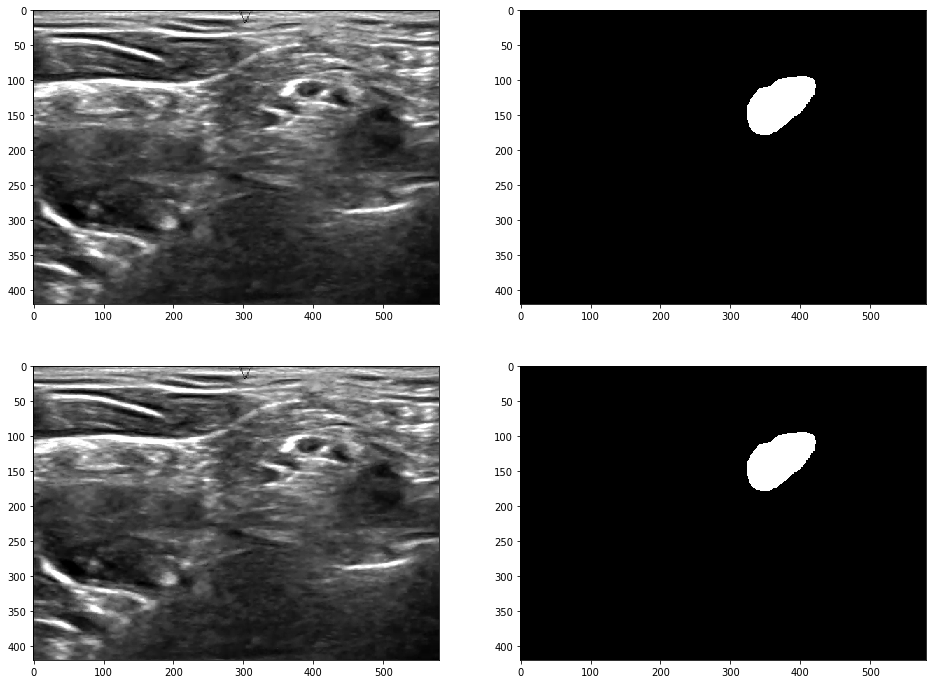

In [10]:
index = 23

image1 = X_train[index]
image1_mask  = y_train[index]
orig_file_name = train_file_names[index]
image1_orig = np.array(Image.open(train_data_path + orig_file_name)) 
image1_orig_mask = np.array(Image.open(train_data_path + orig_file_name.split('.')[0] + '_mask.tif'))
fig, ax = plt.subplots(2,2,figsize = (16,12))
ax[0][0].imshow(image1, cmap = 'gray')
ax[0][1].imshow(image1_mask, cmap = 'gray')
ax[1][0].imshow(image1_orig, cmap = 'gray')
ax[1][1].imshow(image1_orig_mask, cmap = 'gray')

In [11]:
np.array(X_train).shape

(5635, 420, 580)

Lets check how to view train_mask.csv

In [12]:
mask_df = pd.read_csv("/home/root/share/ultrasound-nerve-segmentation-1/train_masks.csv")
mask_df.head()

,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN


In [110]:
image_width = 400
image_height = 400

In [111]:
def preprocess_img_data(X_train , y_train , X_test):
    num_train_images = np.array(X_train).shape[0]
    
    imgs = np.ndarray((num_train_images, image_height, image_width), dtype=np.uint8)
    imgs_mask = np.ndarray((num_train_images, image_height, image_width), dtype=np.uint8)
    
    for i in range(num_train_images):
        imgs[i] = resize(X_train[i], (img_width, img_height), preserve_range=True)
        imgs_mask[i] = resize(y_train[i], (img_width, img_height), preserve_range=True)

    imgs = imgs[..., np.newaxis]
    imgs_mask = imgs_mask[..., np.newaxis]
    
    num_test_images = np.array(X_test).shape[0]    
    imgs_test =  np.ndarray((num_test_images, image_height, image_width), dtype=np.uint8)
    
    for i in range(num_test_images):
        imgs_test[i] = resize(X_test[i], (img_width, img_height), preserve_range=True)
    
    imgs_test = imgs_test[..., np.newaxis]
    
    #data normalization , mean centric
    imgs_train = imgs.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization
    
    imgs_train -= mean
    imgs_train /= std
    
    imgs_mask_train = imgs_mask.astype('float32')
    imgs_mask_train /= 255.  # scale masks to [0, 1]
    
    imgs_test = imgs_test.astype('float32')
    imgs_test -= mean
    imgs_test /= std
    
    return imgs_train, imgs_mask_train, imgs_test

In [112]:
def dice_coeff(y_true , y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth) 

In [113]:
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [120]:
def add2Conv2D_blocks(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    """Function to add 2 convolutional layers with the parameters passed to it"""
    # first layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # second layer
    x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x
    

def unet_model(height, width, n_filters = 16 , dropout = 0.1):
    
    input_tensor = Input((height, width, 1))
    
    #forward path (normal CNN)
    
    c1 = add2Conv2D_blocks(input_tensor, n_filters * 1 , kernel_size = 3, batchnorm=False)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = add2Conv2D_blocks(p1, n_filters * 2 , kernel_size = 3, batchnorm=False)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = add2Conv2D_blocks(p2, n_filters * 4 , kernel_size = 3, batchnorm=False)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = add2Conv2D_blocks(p3, n_filters * 8 , kernel_size = 3, batchnorm=False)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = add2Conv2D_blocks(p4, n_filters * 16 , kernel_size = 3, batchnorm=False)
    
    # reverse path - expansion
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = add2Conv2D_blocks(u6, n_filters * 8, kernel_size = 3, batchnorm = False)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = add2Conv2D_blocks(u7, n_filters * 4, kernel_size = 3, batchnorm = False)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = add2Conv2D_blocks(u8, n_filters * 2, kernel_size = 3, batchnorm = False)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = add2Conv2D_blocks(u9, n_filters * 1, kernel_size = 3, batchnorm = False)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_tensor], outputs=[outputs])
    model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[dice_coef])
    
    return model

In [115]:
imgs_train, imgs_mask_train, imgs_test = preprocess_img_data(X_train , y_train , X_test)

In [122]:
model = unet_model(image_height, image_width)
model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)

print('-'*30)
print('Fitting model...')
print('-'*30)
model.fit(imgs_train, imgs_mask_train, batch_size=32, nb_epoch=20, verbose=1, shuffle=True,
              validation_split=0.2,
              callbacks=[model_checkpoint])

------------------------------
Fitting model...
------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 4508 samples, validate on 1127 samples
Epoch 1/20
4508/4508 [==============================] - 38s 8ms/step - loss: -0.0241 - dice_coef: 0.0241 - val_loss: -0.0262 - val_dice_coef: 0.0262
Epoch 2/20
4508/4508 [==============================] - 34s 8ms/step - loss: -0.0360 - dice_coef: 0.0360 - val_loss: -0.0558 - val_dice_coef: 0.0558
Epoch 3/20
4508/4508 [==============================] - 34s 8ms/step - loss: -0.0983 - dice_coef: 0.0983 - val_loss: -0.1303 - val_dice_coef: 0.1303
Epoch 4/20
4508/4508 [==============================] - 35s 8ms/step - loss: -0.1726 - dice_coef: 0.1726 - val_loss: -0.1916 - val_dice_coef: 0.1916
Epoch 5/20
4508/4508 [==============================] - 34s 8ms/step - loss: -0.2064 - dice_coef: 0.2064 - val_loss: -0.2037 - val_dice_coef: 0.2037
Epoch 6/20
4508/4508 [==============================] - 34s 8ms/step - loss: -0.2305 - dice_coef: 0.2305 - val_loss: -0.1998 - val_dice_coef: 0.1998
Epoch 7/20
4508/4508 [==============================] - 34

In [123]:
print('-'*30)
print('Loading saved weights...')
print('-'*30)
model.load_weights('weights.h5')

print('-'*30)
print('Predicting masks on test data...')
print('-'*30)
imgs_mask_test = model.predict(imgs_test, verbose=1)
np.save('imgs_mask_test.npy', imgs_mask_test)

------------------------------
Loading saved weights...
------------------------------
------------------------------
Predicting masks on test data...
------------------------------
5508/5508 [==============================] - 18s 3ms/step


In [144]:
imgs_test_id = [int(x) for x in test_id]
imgs_test_id

[99,
 2311,
 3923,
 3551,
 858,
 1204,
 4928,
 3697,
 3130,
 2770,
 1665,
 1113,
 2006,
 3646,
 1572,
 1900,
 889,
 3227,
 3580,
 48,
 2815,
 2467,
 5155,
 4715,
 665,
 2298,
 4374,
 1858,
 204,
 5293,
 5242,
 900,
 572,
 1889,
 4402,
 4870,
 2249,
 3409,
 113,
 4063,
 5184,
 3068,
 2628,
 5366,
 1278,
 4954,
 4526,
 456,
 824,
 4281,
 790,
 4147,
 1619,
 5071,
 4196,
 741,
 4631,
 34,
 2869,
 320,
 4985,
 4250,
 487,
 5410,
 5129,
 1790,
 619,
 1037,
 4769,
 2685,
 2122,
 3762,
 278,
 4308,
 1824,
 1456,
 3303,
 2543,
 2931,
 2235,
 2592,
 3475,
 3807,
 1320,
 1487,
 3014,
 2654,
 1741,
 823,
 451,
 4286,
 4521,
 4953,
 5361,
 3958,
 797,
 4140,
 1168,
 4636,
 4191,
 746,
 5076,
 33,
 3989,
 5417,
 4257,
 480,
 1509,
 327,
 4982,
 1030,
 1797,
 3765,
 2125,
 2682,
 1451,
 1823,
 2936,
 2544,
 3304,
 3800,
 3472,
 2595,
 2232,
 1480,
 509,
 1327,
 4479,
 5239,
 2653,
 3013,
 168,
 4018,
 1746,
 3556,
 3924,
 2316,
 1203,
 2777,
 3137,
 3690,
 1662,
 1114,
 3641,
 2001,
 1907,
 1575,
 2

In [140]:
    print('-' * 30)
    print('Saving predicted masks to files...')
    print('-' * 30)
    pred_dir = 'preds'
    if not os.path.exists(pred_dir):
        os.mkdir(pred_dir)
    for image, image_id in zip(imgs_mask_test, imgs_test_id):
        image = (image[:, :, 0] * 255.).astype(np.uint8)
        imsave(os.path.join(pred_dir, str(image_id) + '_pred.png'), image)

------------------------------
Saving predicted masks to files...
------------------------------


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/3697_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/4402_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/619_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/1741_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/1509_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/2125_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/py

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/2994_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/3640_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/1562_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/497_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/4291_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/1787_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/py

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/4518_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/5358_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/5200_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/993_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/246_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: preds/1091_pred.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/pyt

In [153]:
image_rows = 420
image_cols = 580

def prep(img):
    img = img.astype('float32')
    img = (img > 0.5).astype(np.uint8)  # threshold
    img = resize(img, (image_cols, image_rows), preserve_range=True)
    return img


def run_length_enc(label):
    from itertools import chain
    x = label.transpose().flatten()
    y = np.where(x > 0)[0]
    if len(y) < 10:  # consider as empty
        return ''
    z = np.where(np.diff(y) > 1)[0]
    start = np.insert(y[z+1], 0, y[0])
    end = np.append(y[z], y[-1])
    length = end - start
    res = [[s+1, l+1] for s, l in zip(list(start), list(length))]
    res = list(chain.from_iterable(res))
    return ' '.join([str(r) for r in res])


def submission(test_id):
    imgs_test = np.load('imgs_mask_test.npy')
    
    argsort = np.argsort(test_id)
    
    
    new_id = []
    new_img = []
    
#     for i in argsort:
#         new_id.append(test_id[i])
#         new_img.append(imgs_test[i])
    test_id = np.array(test_id)[argsort]
    imgs_test = imgs_test[argsort]

    total = imgs_test.shape[0]
    ids = []
    rles = []
    for i in range(total):
        img = imgs_test[i, 0]
        img = prep(img)
        rle = run_length_enc(img)

        rles.append(rle)
        ids.append(test_id[i])

        if i % 100 == 0:
            print('{}/{}'.format(i, total))

    first_row = 'img,pixels'
    file_name = 'submission.csv'

    with open(file_name, 'w+') as f:
        f.write(first_row + '\n')
        for i in range(total):
            s = str(ids[i]) + ',' + rles[i]
            f.write(s + '\n')

In [154]:
submission(imgs_test_id)

0/5508
100/5508
200/5508
300/5508
400/5508
500/5508
600/5508
700/5508
800/5508
900/5508
1000/5508
1100/5508
1200/5508
1300/5508
1400/5508
1500/5508
1600/5508
1700/5508
1800/5508
1900/5508
2000/5508
2100/5508
2200/5508
2300/5508
2400/5508
2500/5508
2600/5508
2700/5508
2800/5508
2900/5508
3000/5508
3100/5508
3200/5508
3300/5508
3400/5508
3500/5508
3600/5508
3700/5508
3800/5508
3900/5508
4000/5508
4100/5508
4200/5508
4300/5508
4400/5508
4500/5508
4600/5508
4700/5508
4800/5508
4900/5508
5000/5508
5100/5508
5200/5508
5300/5508
5400/5508
5500/5508
